In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import keyword
from IPython.display import set_matplotlib_formats
from pprint import pprint
import patternrekt as prekt
set_matplotlib_formats('retina')
plt.style.use('seaborn-notebook')

# Should We Eat the Mushroom
> **Every mushroom is edible except some can be eaten exactly once.**

In this class we will consider the problem of deciding whether the given mushroom is edible or poisonous.

<img src="mushroom.JPG" alt="Mushroom" width="200"/>

Luckily we don't have to sacrifice anyone tasting mushrooms since certain brave souls have done that for us.
Data from Kaggle: https://www.kaggle.com/uciml/mushroom-classification

The data descibes the features of the mushroom and whether it is poisonous.


## Basics Stuff

### Reading Data

In [2]:
#reading Data (civilized way)
df = pd.read_csv('mushrooms_train.csv')
#fix messy column names
#print(df.columns)
df.columns = df.columns \
    .str.strip() \
    .str.lower() \
    .str.replace(' ', '_') \
    .str.replace('(', '') \
    .str.replace(')', '') \
    .str.replace('-','_') \
    .map(lambda x: 'x'+x if x in keyword.kwlist else x )
#print(df.columns)
#or if you want to go manual (My favorite)
#data = np.genfromtxt('mushrooms.csv', skip_header=1, dtype=str, delimiter=',')

In [11]:
display(df)

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


### Accessing Rows

In [12]:
# This is how you iterate by row
# Use this for now
# Eventually you will learn that there is usually a better way to do it.
# And that this is typically the last resort

for row in df.itertuples(name="Mushroom"):
    if row.Index > 1:
        break
    print(row)
    print('******* cap_shape', row.cap_shape)
    
# or you can access it by like this note it's bracket not parentheses
print(df.iloc[300].odor)
print(df.odor[300])


Mushroom(Index=0, xclass='p', cap_shape='x', cap_surface='s', cap_color='n', bruises='t', odor='p', gill_attachment='f', gill_spacing='c', gill_size='n', gill_color='k', stalk_shape='e', stalk_root='e', stalk_surface_above_ring='s', stalk_surface_below_ring='s', stalk_color_above_ring='w', stalk_color_below_ring='w', veil_type='p', veil_color='w', ring_number='o', ring_type='p', spore_print_color='k', population='s', habitat='u')
******* cap_shape x
Mushroom(Index=1, xclass='e', cap_shape='x', cap_surface='s', cap_color='y', bruises='t', odor='a', gill_attachment='f', gill_spacing='c', gill_size='b', gill_color='k', stalk_shape='e', stalk_root='c', stalk_surface_above_ring='s', stalk_surface_below_ring='s', stalk_color_above_ring='w', stalk_color_below_ring='w', veil_type='p', veil_color='w', ring_number='o', ring_type='p', spore_print_color='n', population='n', habitat='g')
******* cap_shape x
n
n


### Basic Statistics

In [13]:
#some simple statistics
pd.set_option('display.max_columns', 100)
df.describe()

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,p,t,b,s,s,w,w,p,w,o,p,n,v,d
freq,3743,3442,2892,1775,3651,3056,6982,5941,5116,1410,3986,3735,4528,4288,3884,3801,6999,6983,6682,3503,1924,3314,2890


In [14]:
df.cap_shape.value_counts()

x    3442
f    2988
b     323
k     212
s      32
c       2
Name: cap_shape, dtype: int64

In [15]:
df.cap_shape

0       x
1       x
2       b
3       x
4       x
5       x
6       b
7       b
8       x
9       b
10      x
11      x
12      b
13      x
14      x
15      s
16      f
17      x
18      x
19      x
20      b
21      x
22      b
23      b
24      b
25      f
26      x
27      x
28      f
29      x
       ..
6969    k
6970    x
6971    f
6972    k
6973    f
6974    x
6975    k
6976    f
6977    x
6978    x
6979    f
6980    k
6981    k
6982    k
6983    x
6984    b
6985    k
6986    x
6987    x
6988    f
6989    b
6990    k
6991    k
6992    k
6993    f
6994    k
6995    f
6996    k
6997    k
6998    x
Name: cap_shape, Length: 6999, dtype: object

### Human Learning

#### 1) Let us calculate some basic stuff. What is the probabiliy of you dying if you pick a random mushroom and eat?
$$
P(\text{poisonous}) = ???
$$

In [3]:
sum(df.xclass == 'p')/len(df)

0.4652093156165166

#### 2) Given that it is a red cap mushroom. What is the probability that it is poisonous?

$$
P(\text{poisonous} | \text{red cap}) = ???
$$

In [5]:
red_cap = df[df.cap_color == 'e']
sum(red_cap.xclass == 'p')/len(red_cap)

0.4666666666666667

#### 3) Given that a mushroom is poisonous. What is the probability that it has a red cap?

$$
    P(\text{red cap} | \text{poisonous}) = ???
$$


In [6]:
poisonous = df[df.xclass == 'p']
sum(poisonous.cap_color == 'e')/len(poisonous)

0.1676904176904177

#### 4) Which cap color has the highest probability of killing you? Should we calculate
$$ P(\text{poisonous} | \text{red cap}) \textbf{ or } P(\text{red cap} | \text{poisonous}) $$

**Ans:** $ P(\text{poisonous} | \text{red cap}) $

If you eat red cap mushroom, you are gonna die
--> Since we know that the mushroom is red cap, we need to find the probability of whether it's poisonous

#### 5) If your friend die of eating mushroom, what is the cap color that he most likely ate? Should we calculate
$$ P(\text{poisonous} | \text{red cap}) \textbf{ or } P(\text{red cap} | \text{poisonous}) $$

**Ans:** $ P(\text{red cap} | \text{poisonous}) $

If you die from eating mushoom, what cap color is it
--> Since we know that the mushroom is poisonous, we need to find the probability of what color it is

#### 6) If we were to decide whether to eat a given mushroom or not which one should we calculate?

#### 7) What is the relation between
$$ P(\text{poisonous} | \text{red cap}) \textbf{ and } P(\text{red cap} | \text{poisonous}) $$

#### 8) Visualization: Let us learn how to draw some fancy graph? Plot the graph below for all the columns.

The width of each bar represents how many mushroom are of given cap_color.

The stack shows the percentage of poisonous/edible given cap_color.

[('n', {'total': 1775, 'p': 708, 'e': 1067}),
 ('g', {'total': 1708, 'p': 808, 'e': 900}),
 ('e', {'total': 1170, 'p': 546, 'e': 624}),
 ('y', {'total': 1065, 'p': 665, 'e': 400}),
 ('w', {'total': 917, 'p': 320, 'e': 597}),
 ('b', {'total': 168, 'p': 120, 'e': 48}),
 ('p', {'total': 137, 'p': 88, 'e': 49}),
 ('c', {'total': 27, 'p': 1, 'e': 26}),
 ('u', {'total': 16, 'p': 0, 'e': 16}),
 ('r', {'total': 16, 'p': 0, 'e': 16})]

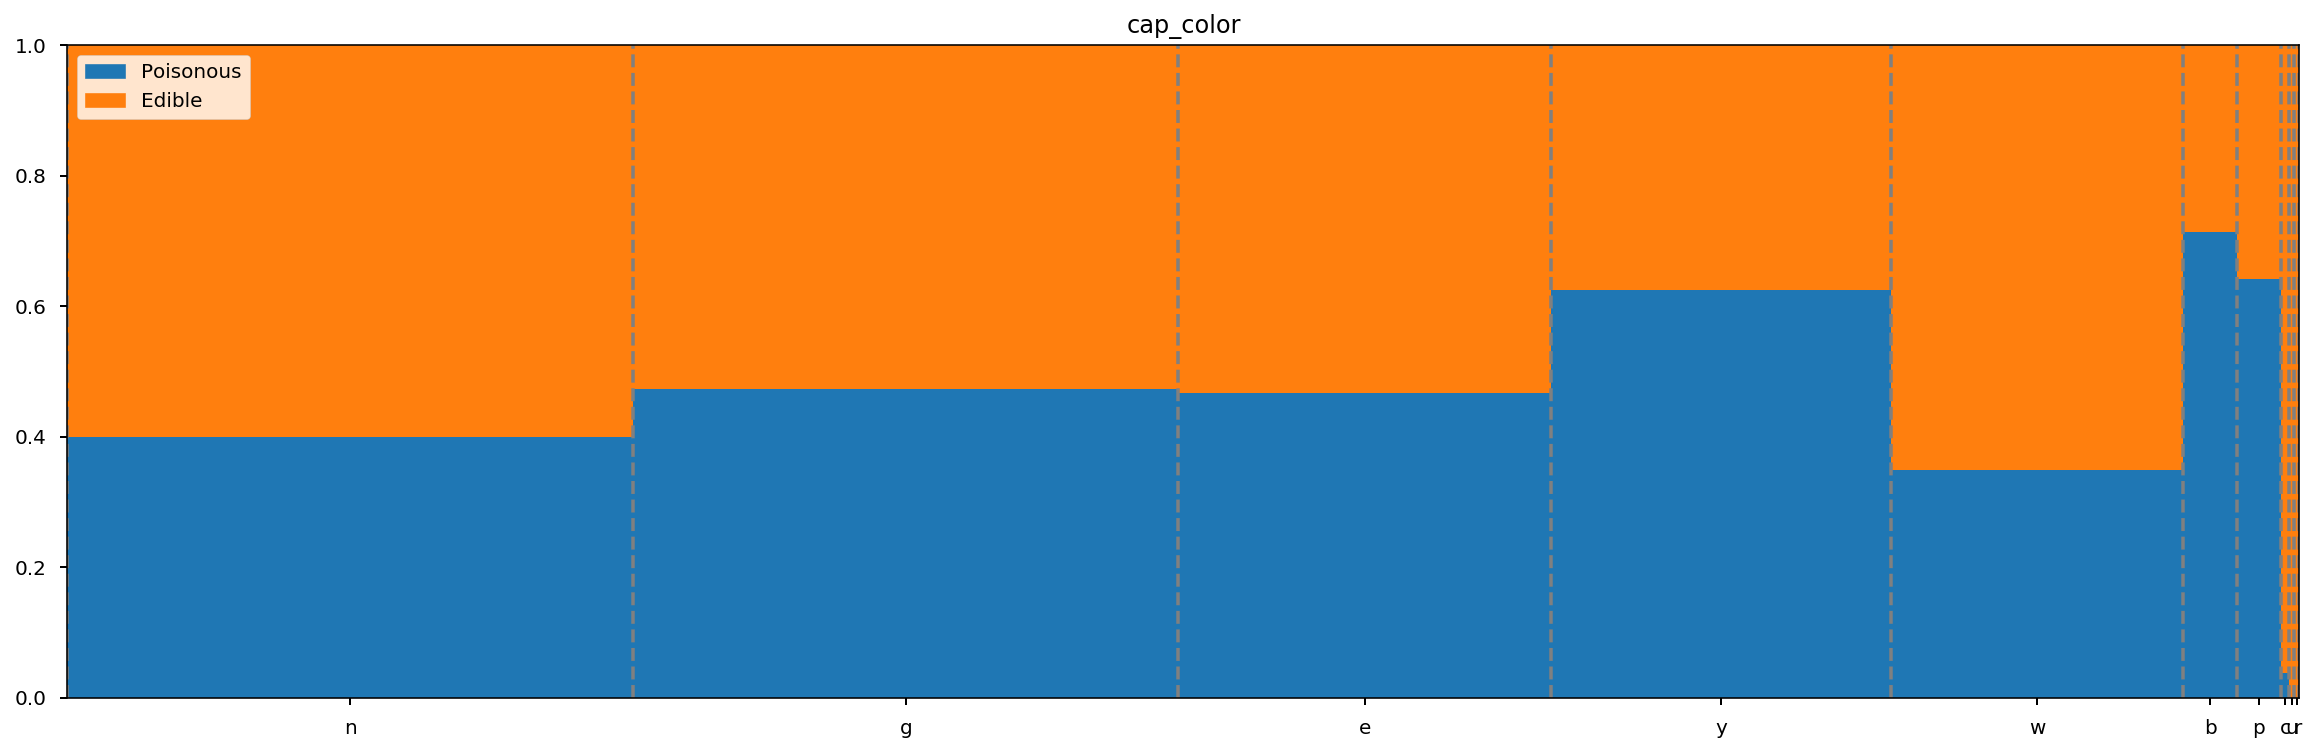

In [16]:
#see pattenrekt.py for the magic optimize it and make a pull request if you like
prekt.mushroom_plot(df.cap_color, df.xclass, legend_map={'p': 'Poisonous', 'e': 'Edible'})

#### 9) With data exploration from 8) If we want to use exactly one mushroom feature to decide edibility of a mushroom, which one do we use? Code it up.

In [7]:
df.columns

Index(['xclass', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 432x288 with 0 Axes>

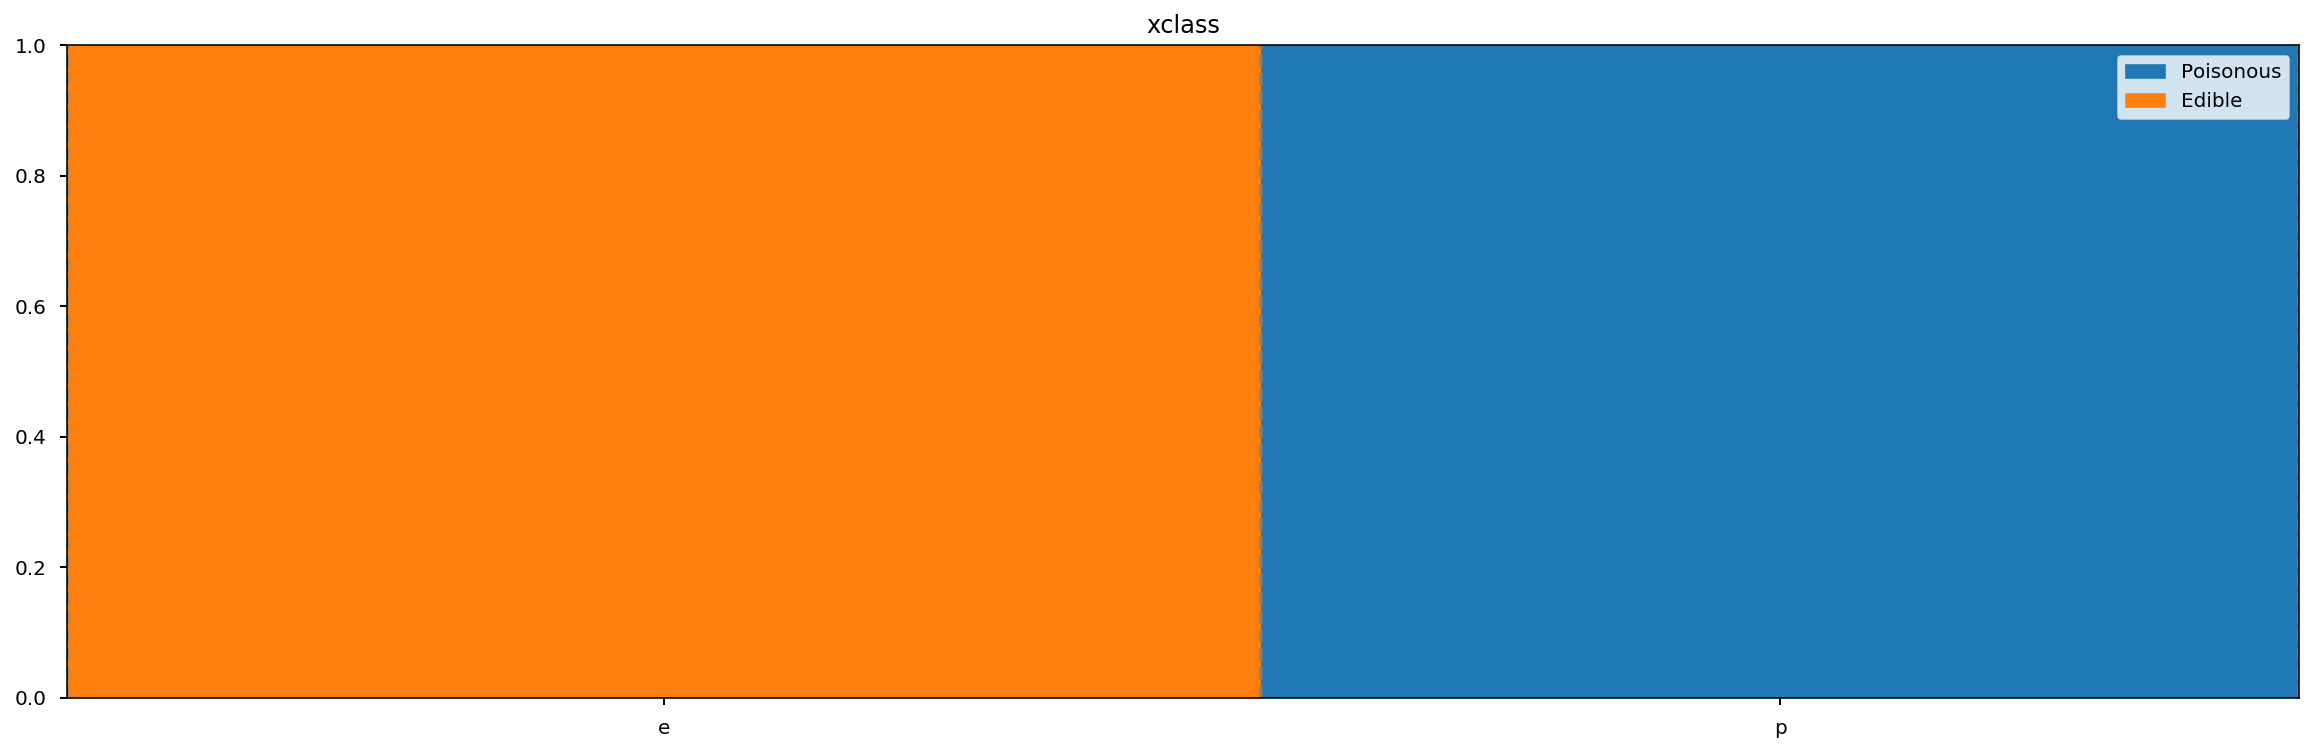

<Figure size 432x288 with 0 Axes>

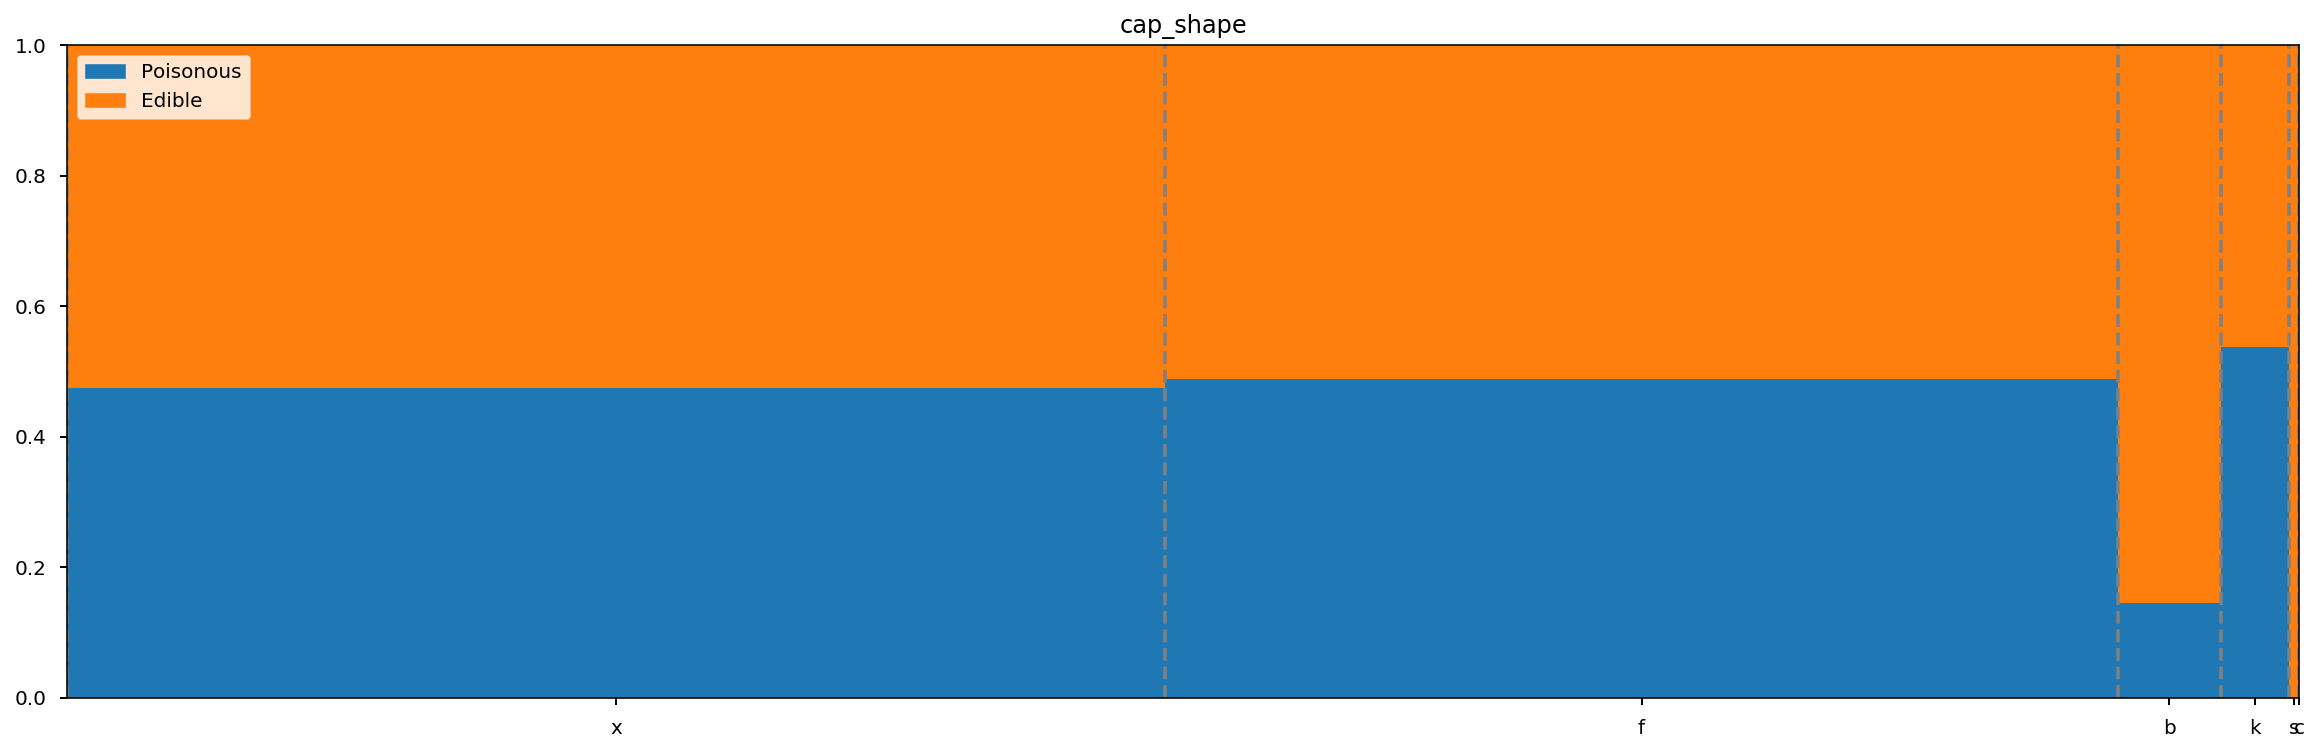

<Figure size 432x288 with 0 Axes>

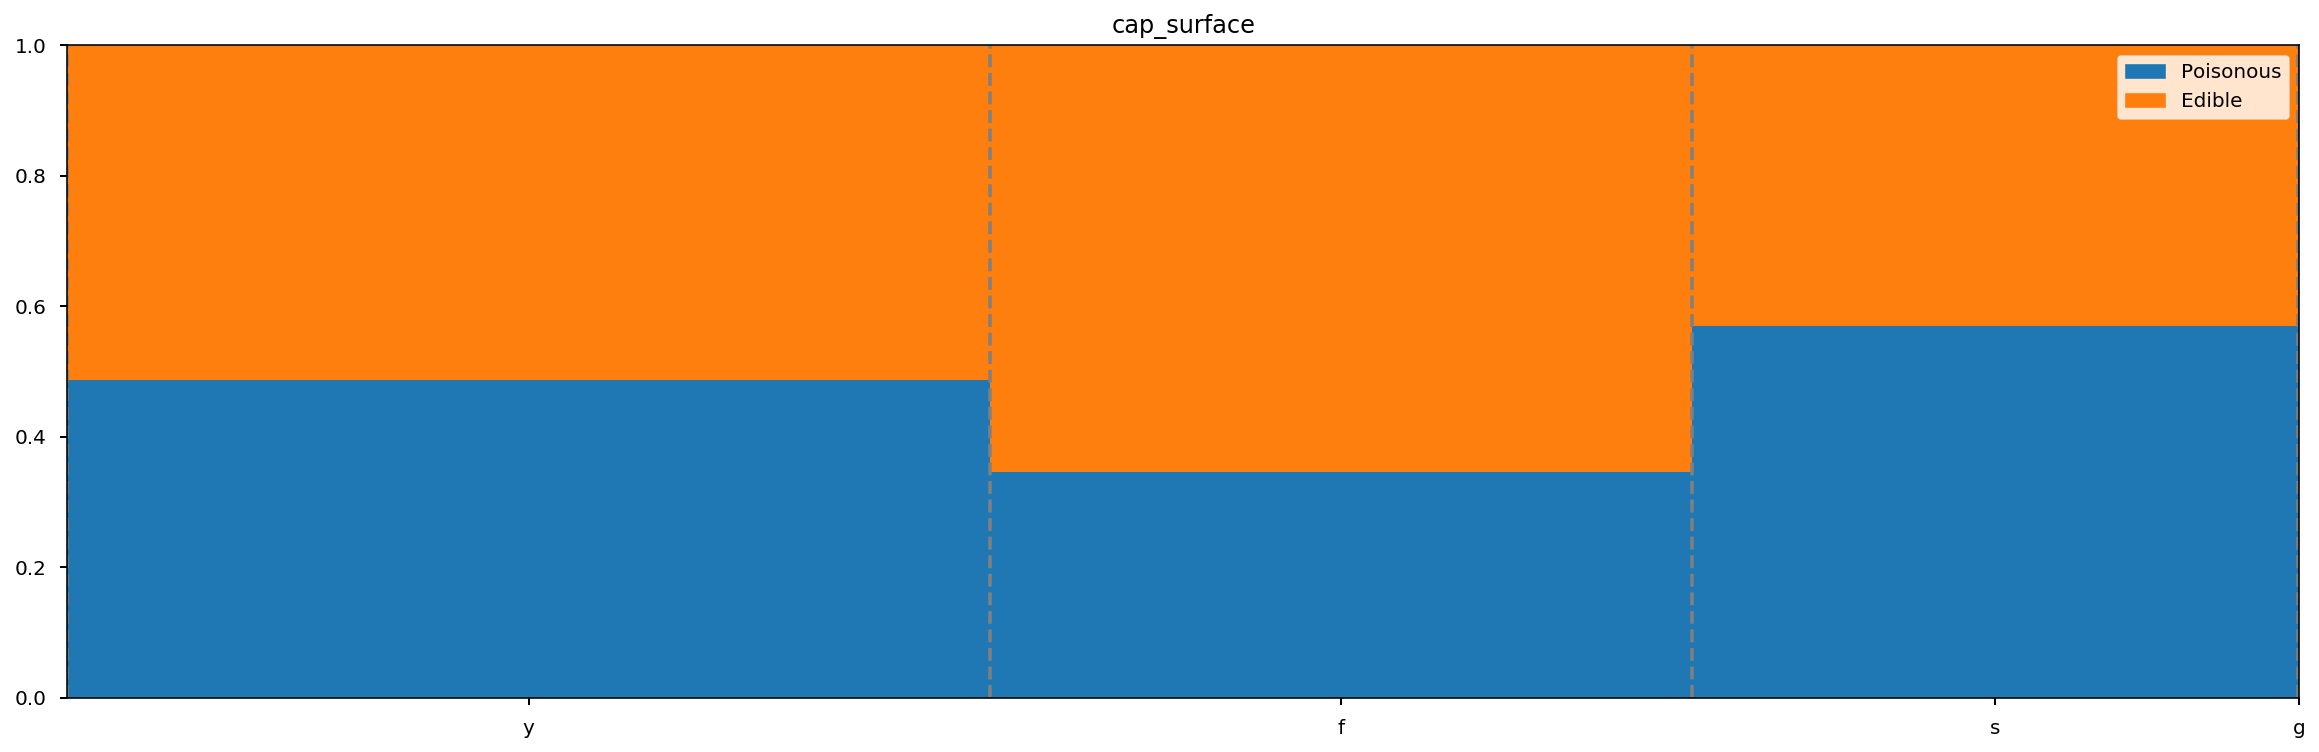

<Figure size 432x288 with 0 Axes>

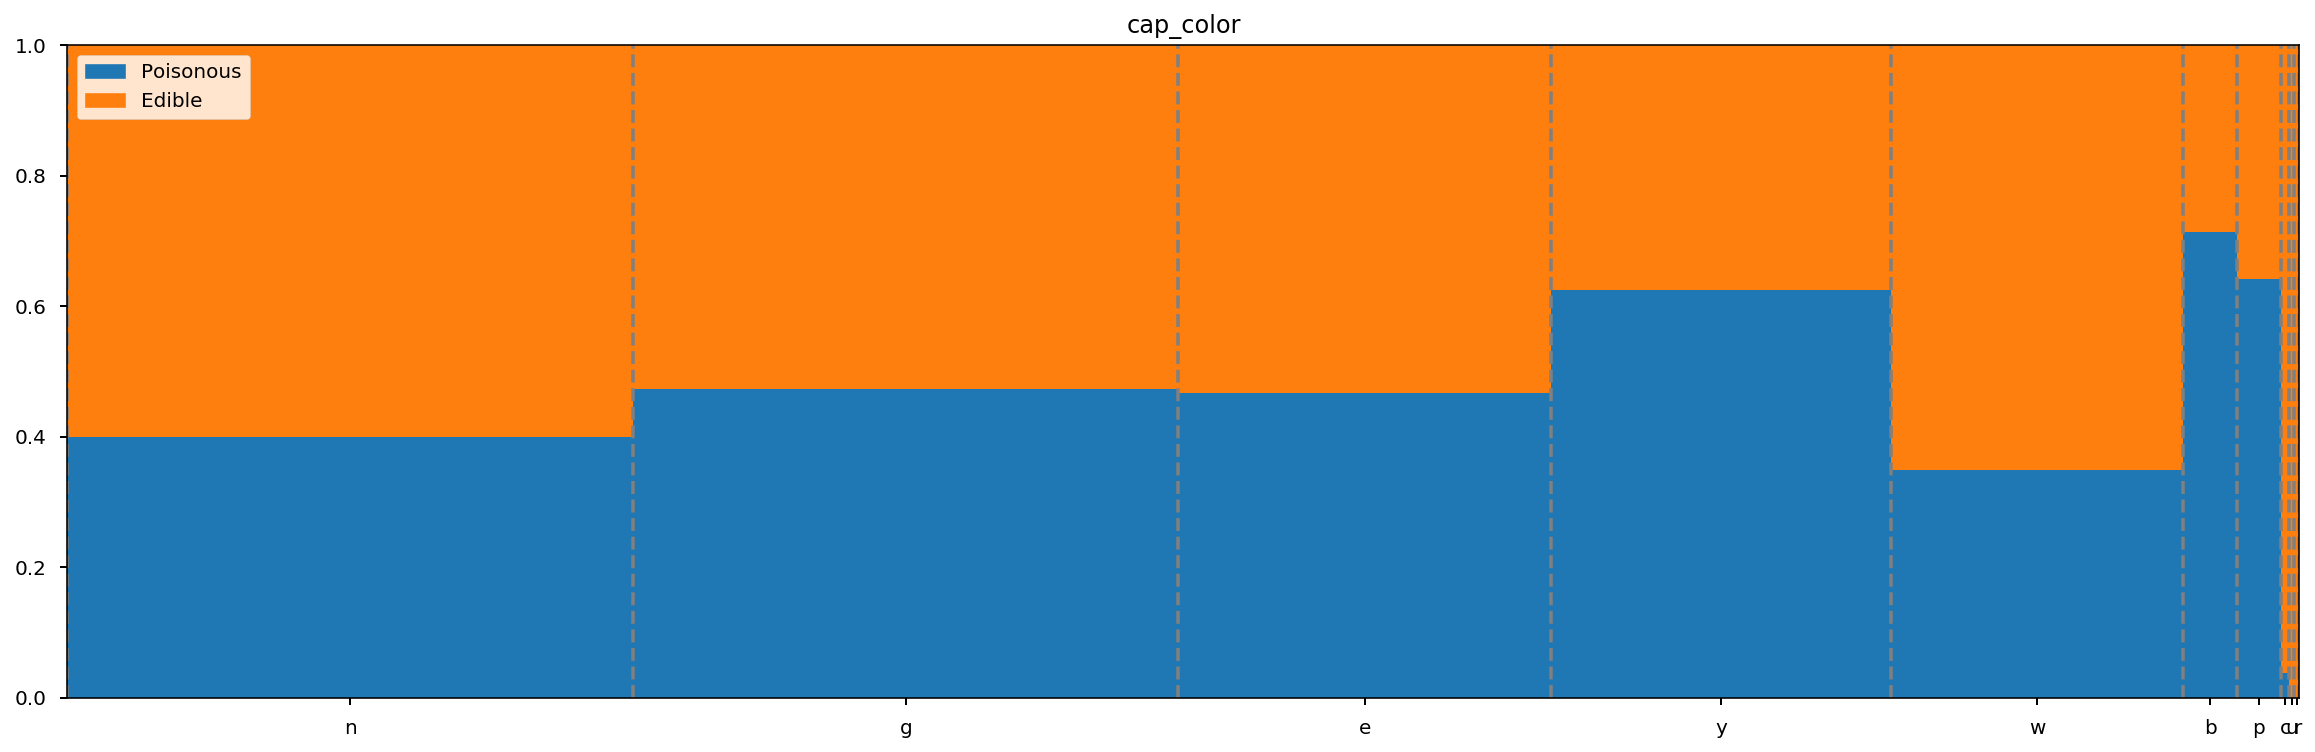

<Figure size 432x288 with 0 Axes>

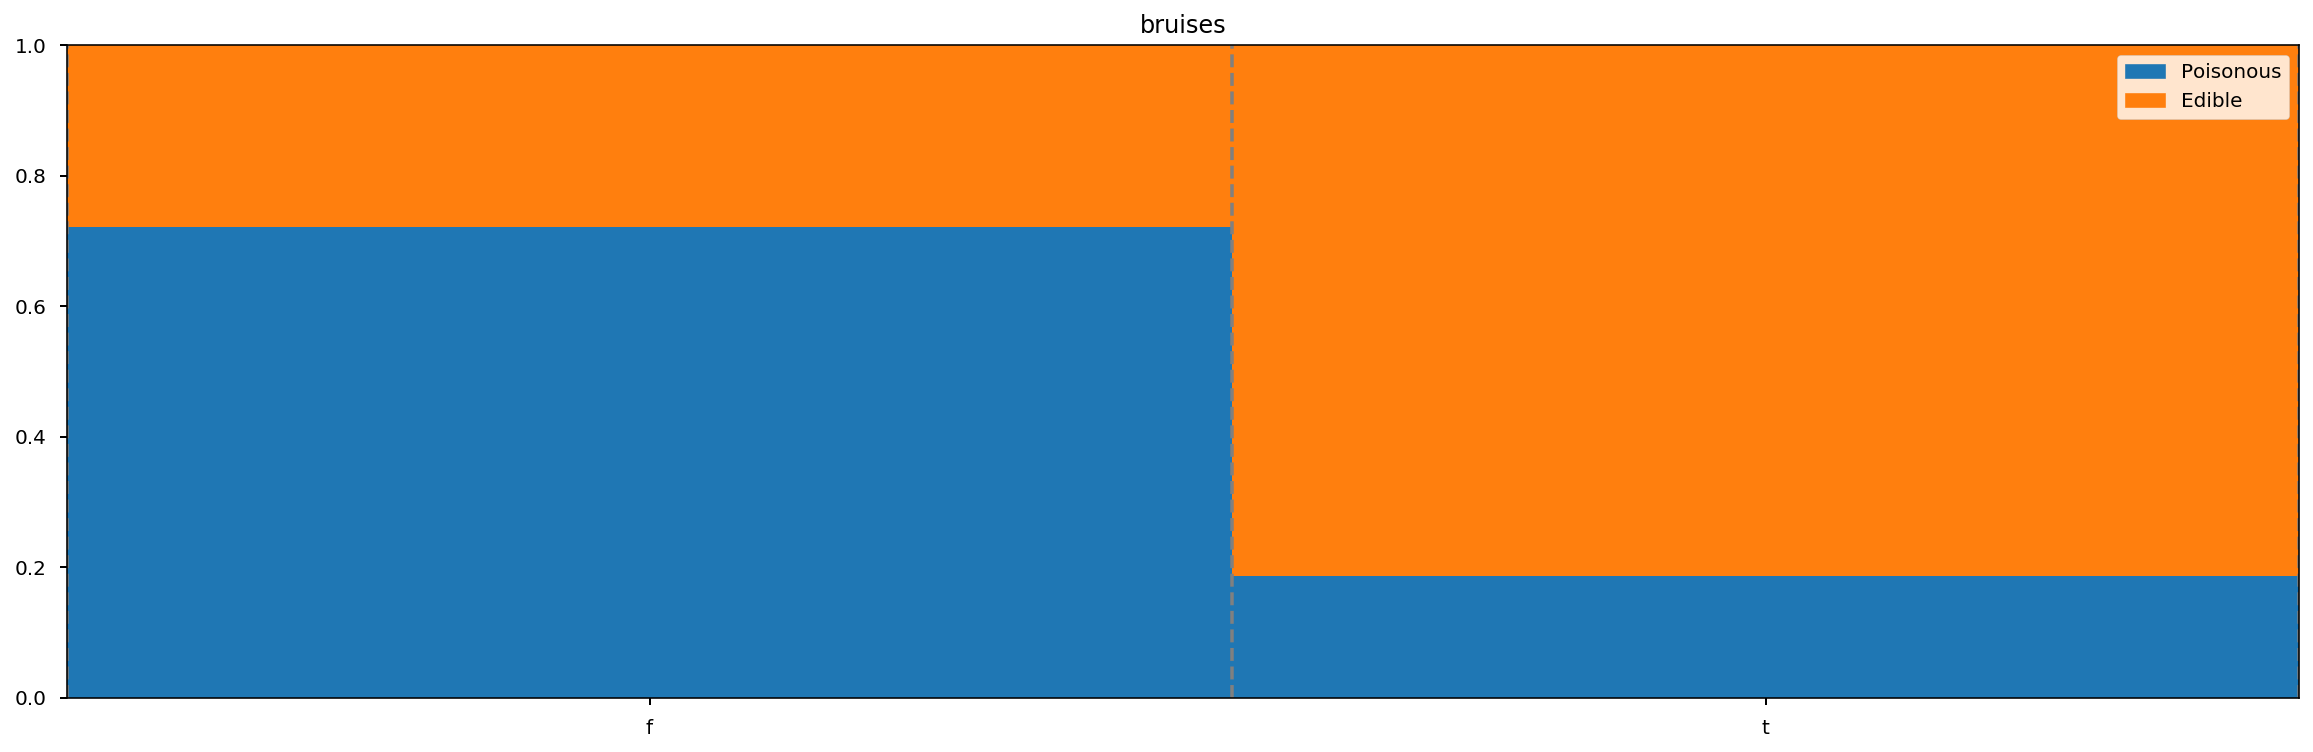

<Figure size 432x288 with 0 Axes>

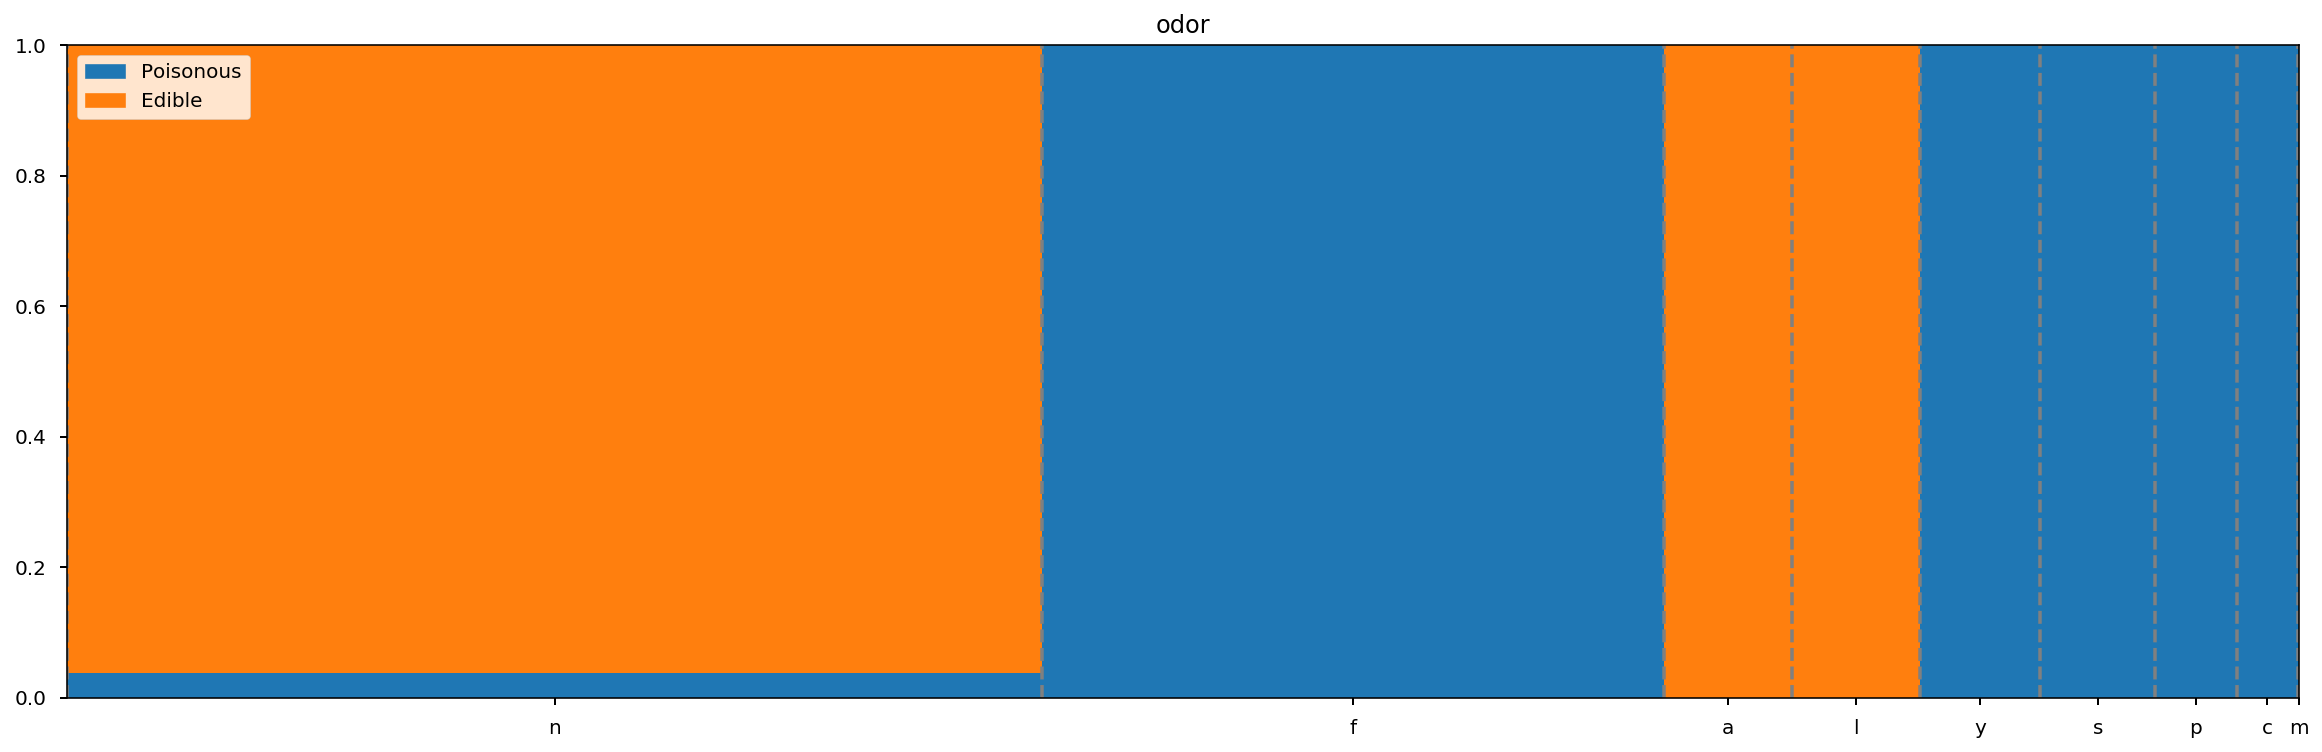

<Figure size 432x288 with 0 Axes>

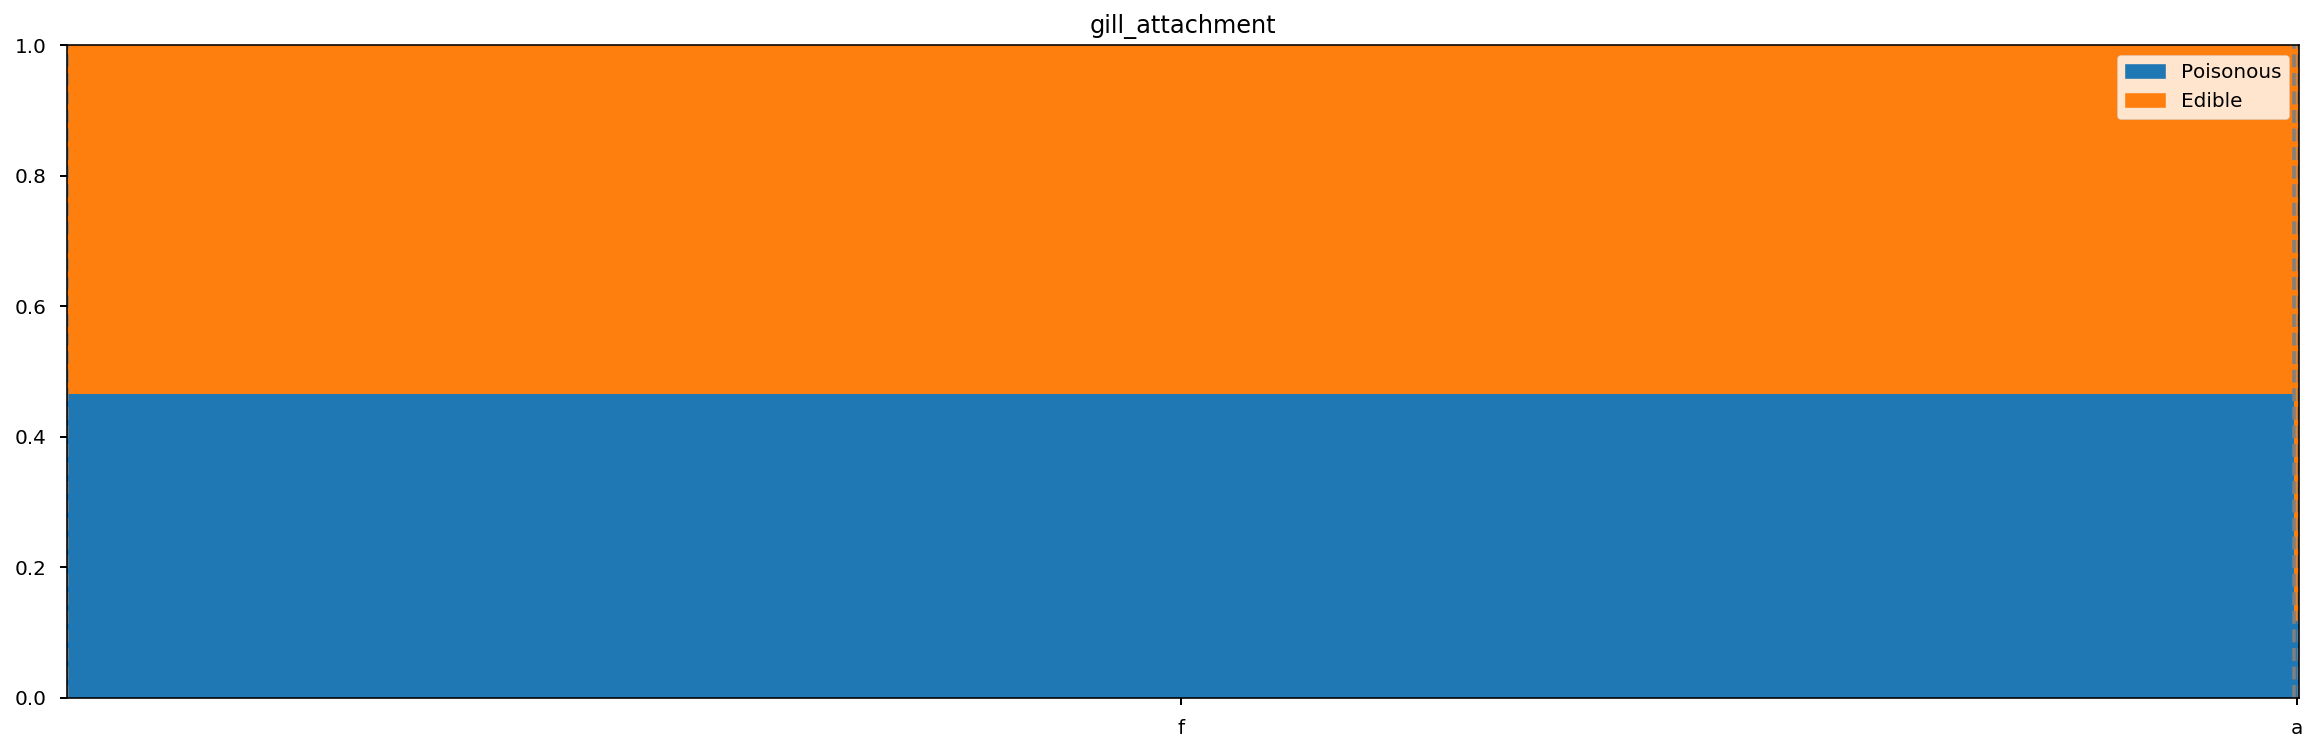

<Figure size 432x288 with 0 Axes>

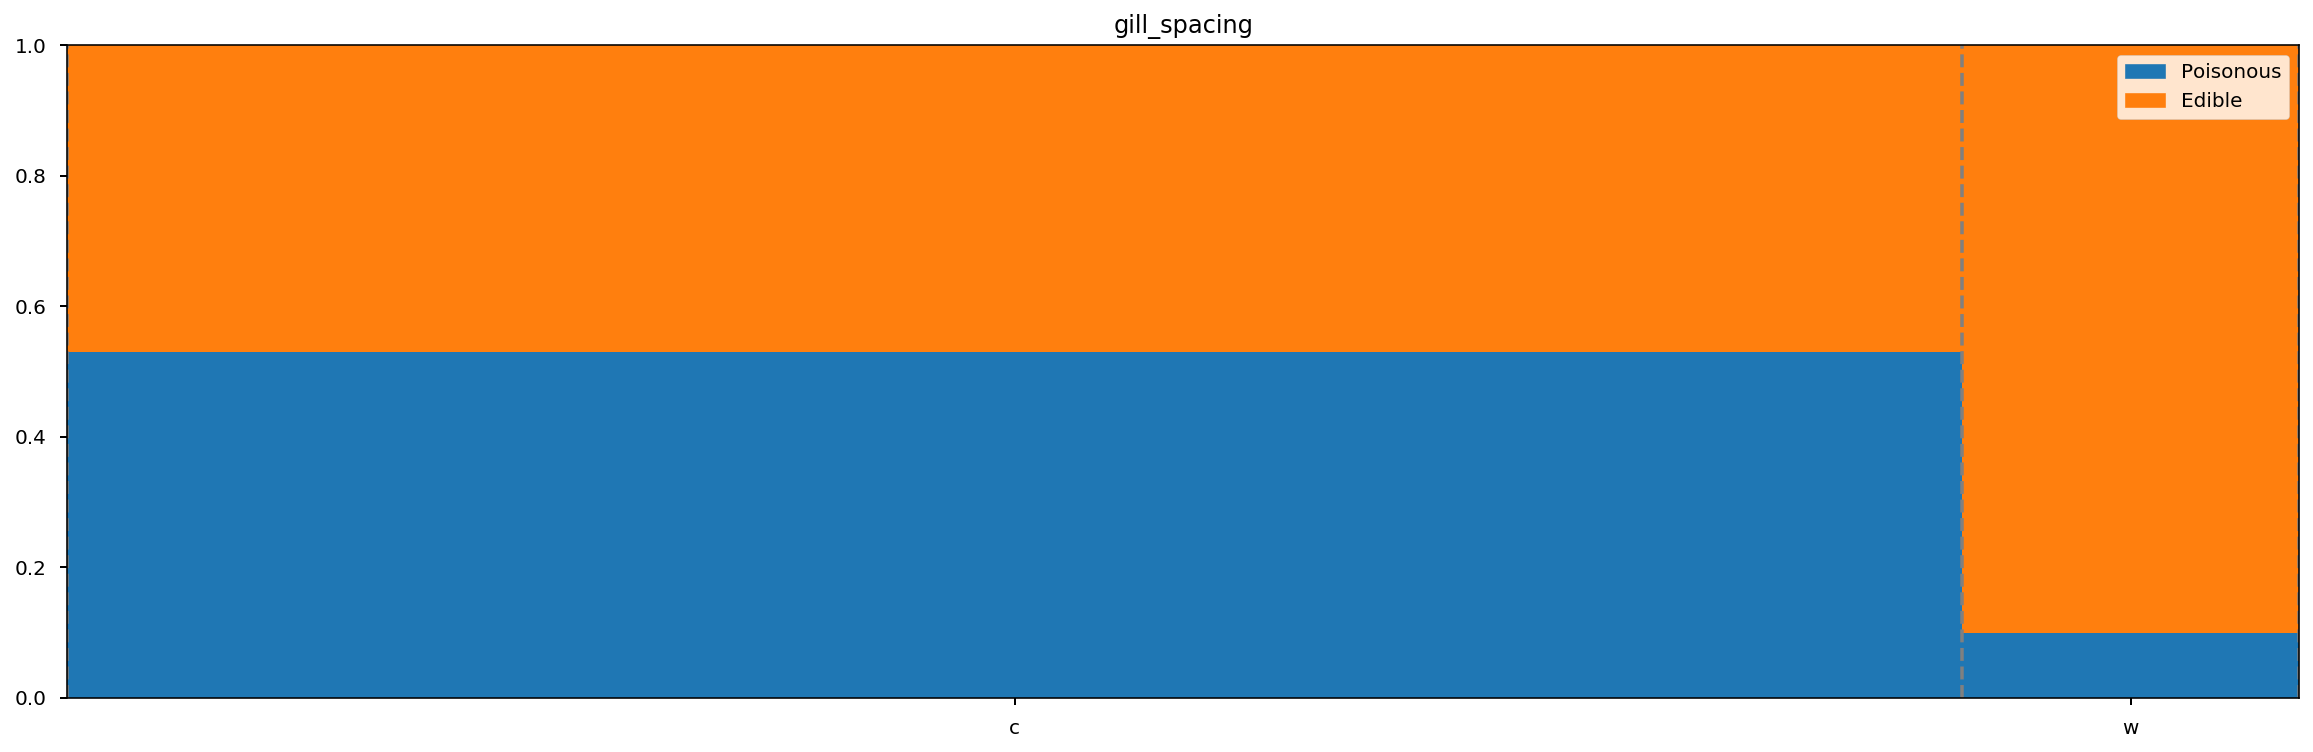

<Figure size 432x288 with 0 Axes>

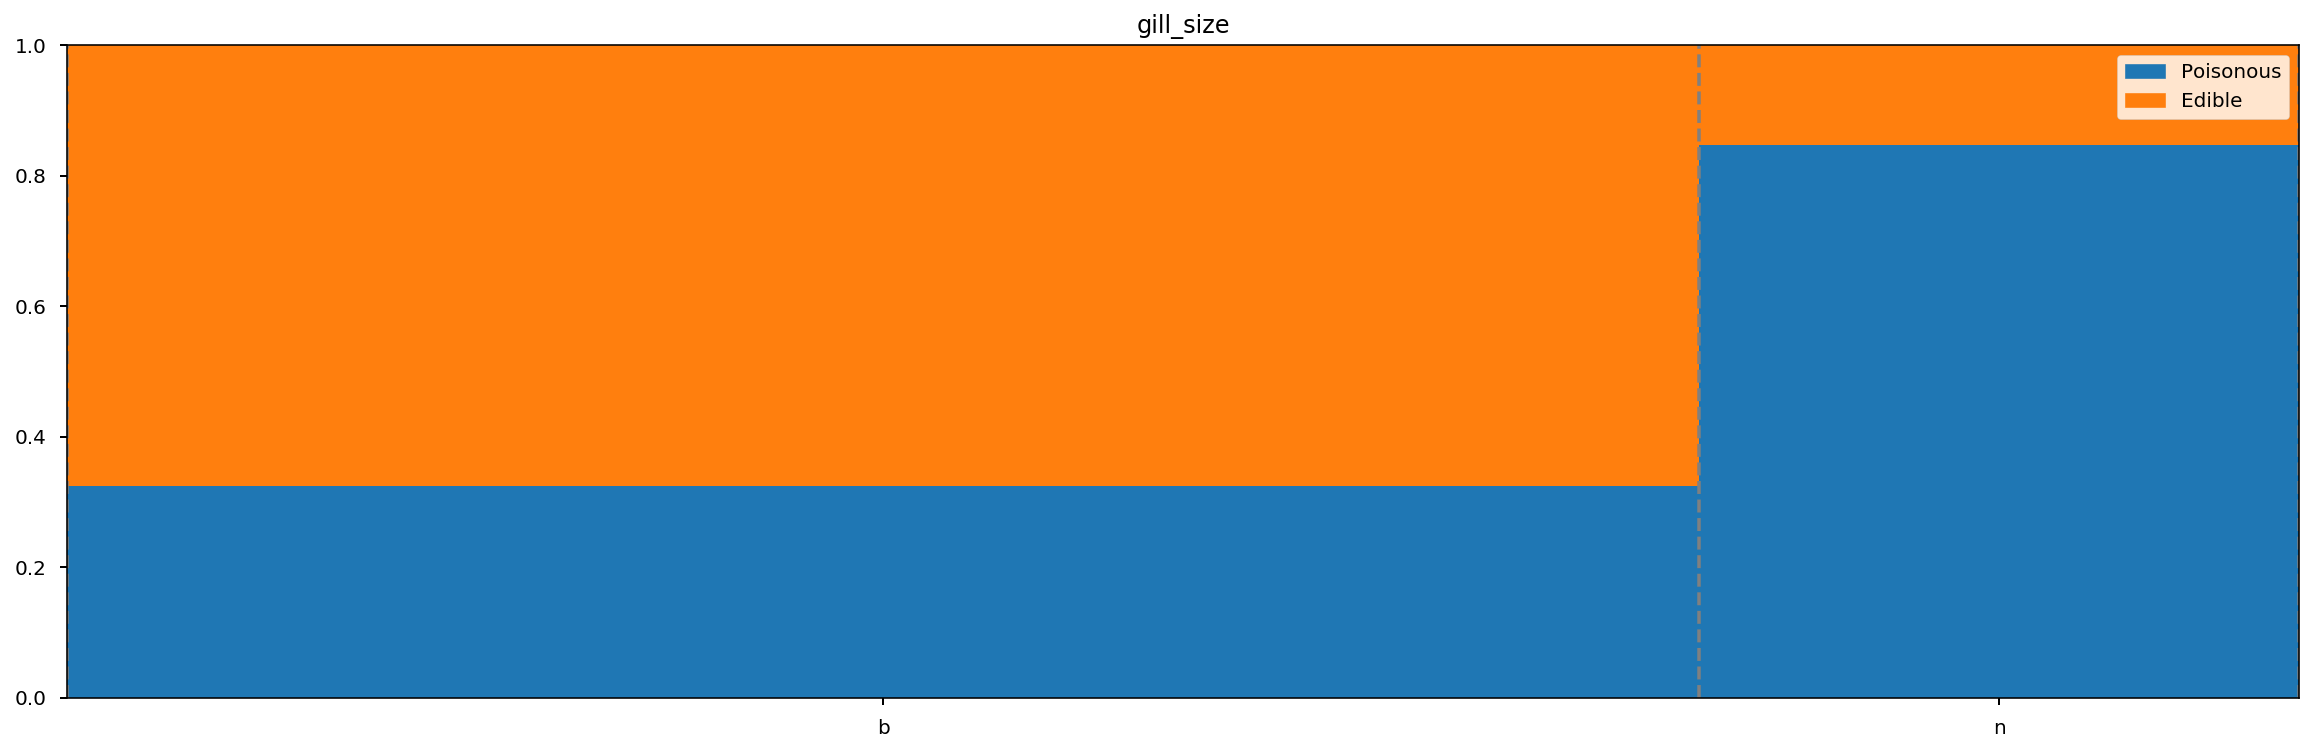

<Figure size 432x288 with 0 Axes>

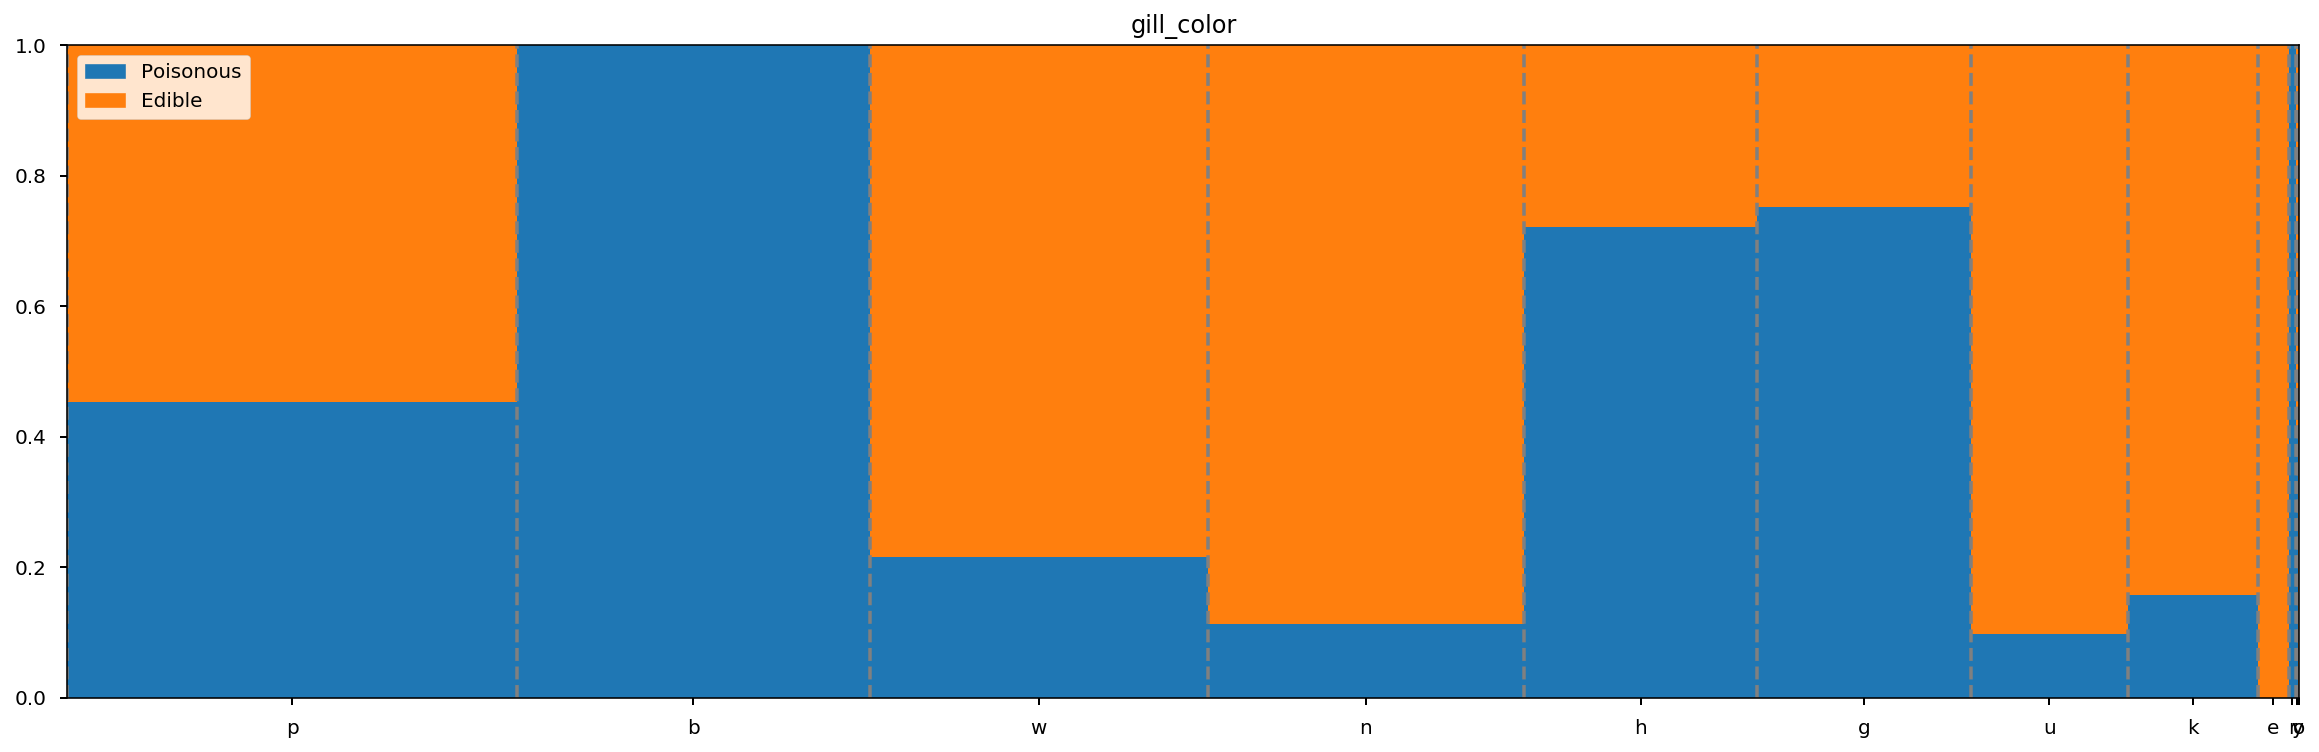

<Figure size 432x288 with 0 Axes>

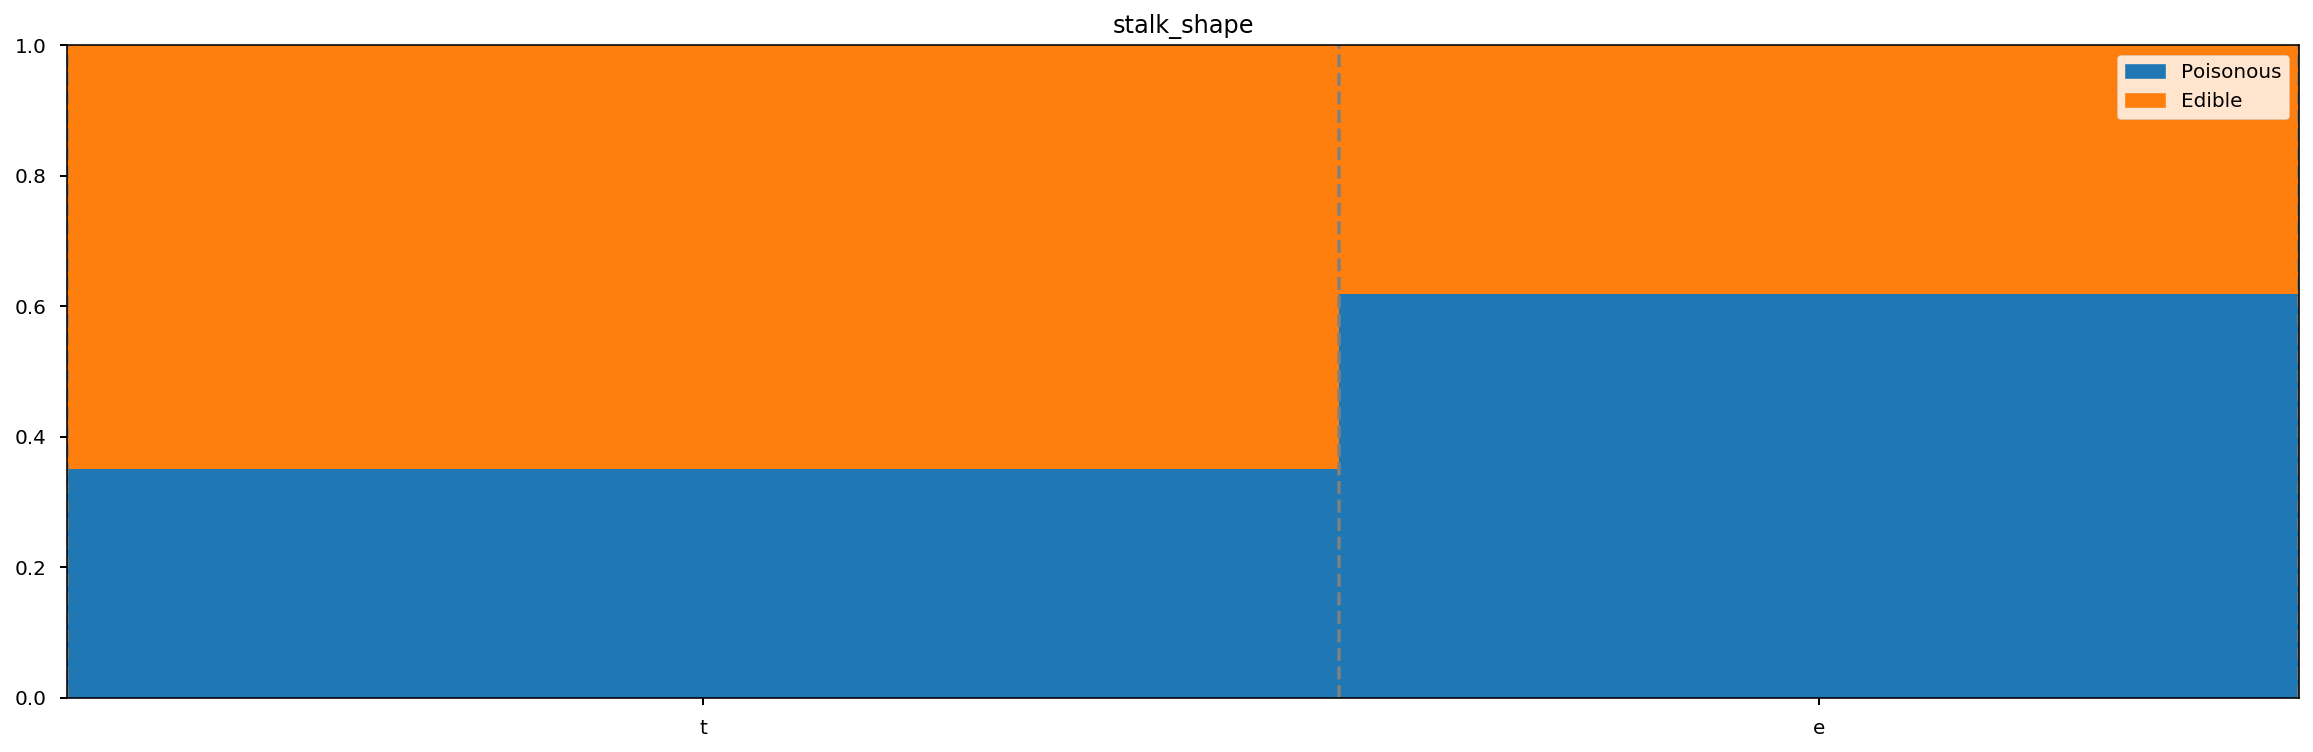

<Figure size 432x288 with 0 Axes>

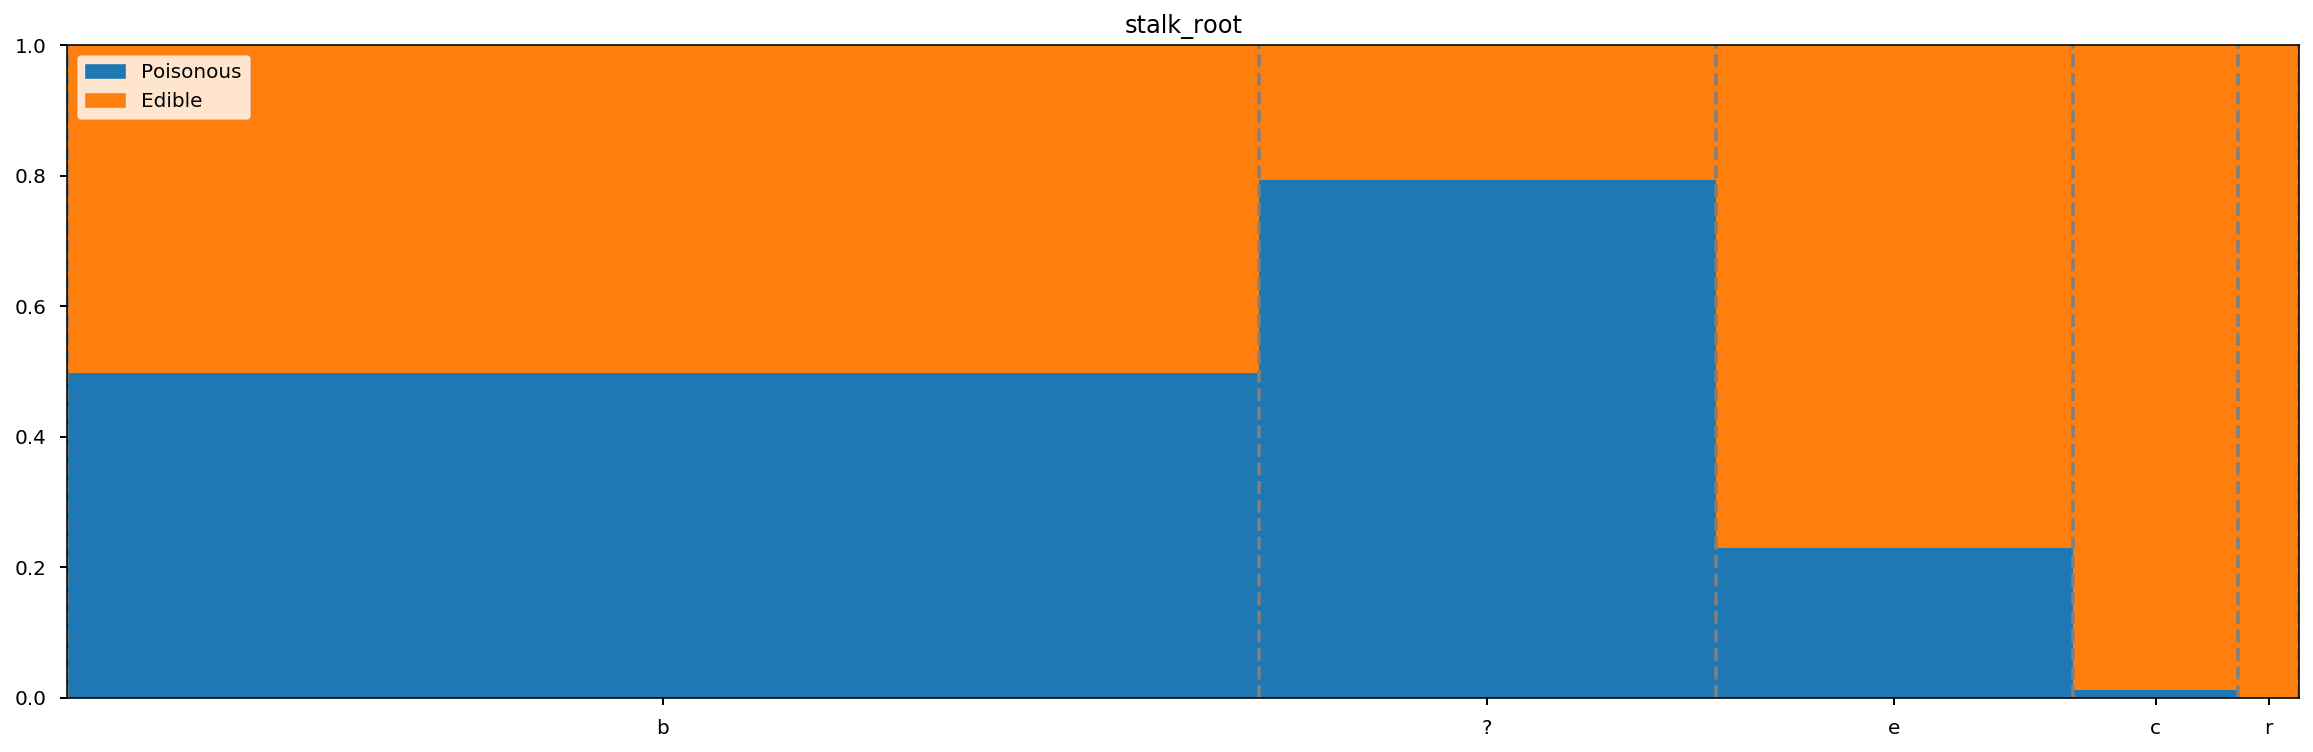

<Figure size 432x288 with 0 Axes>

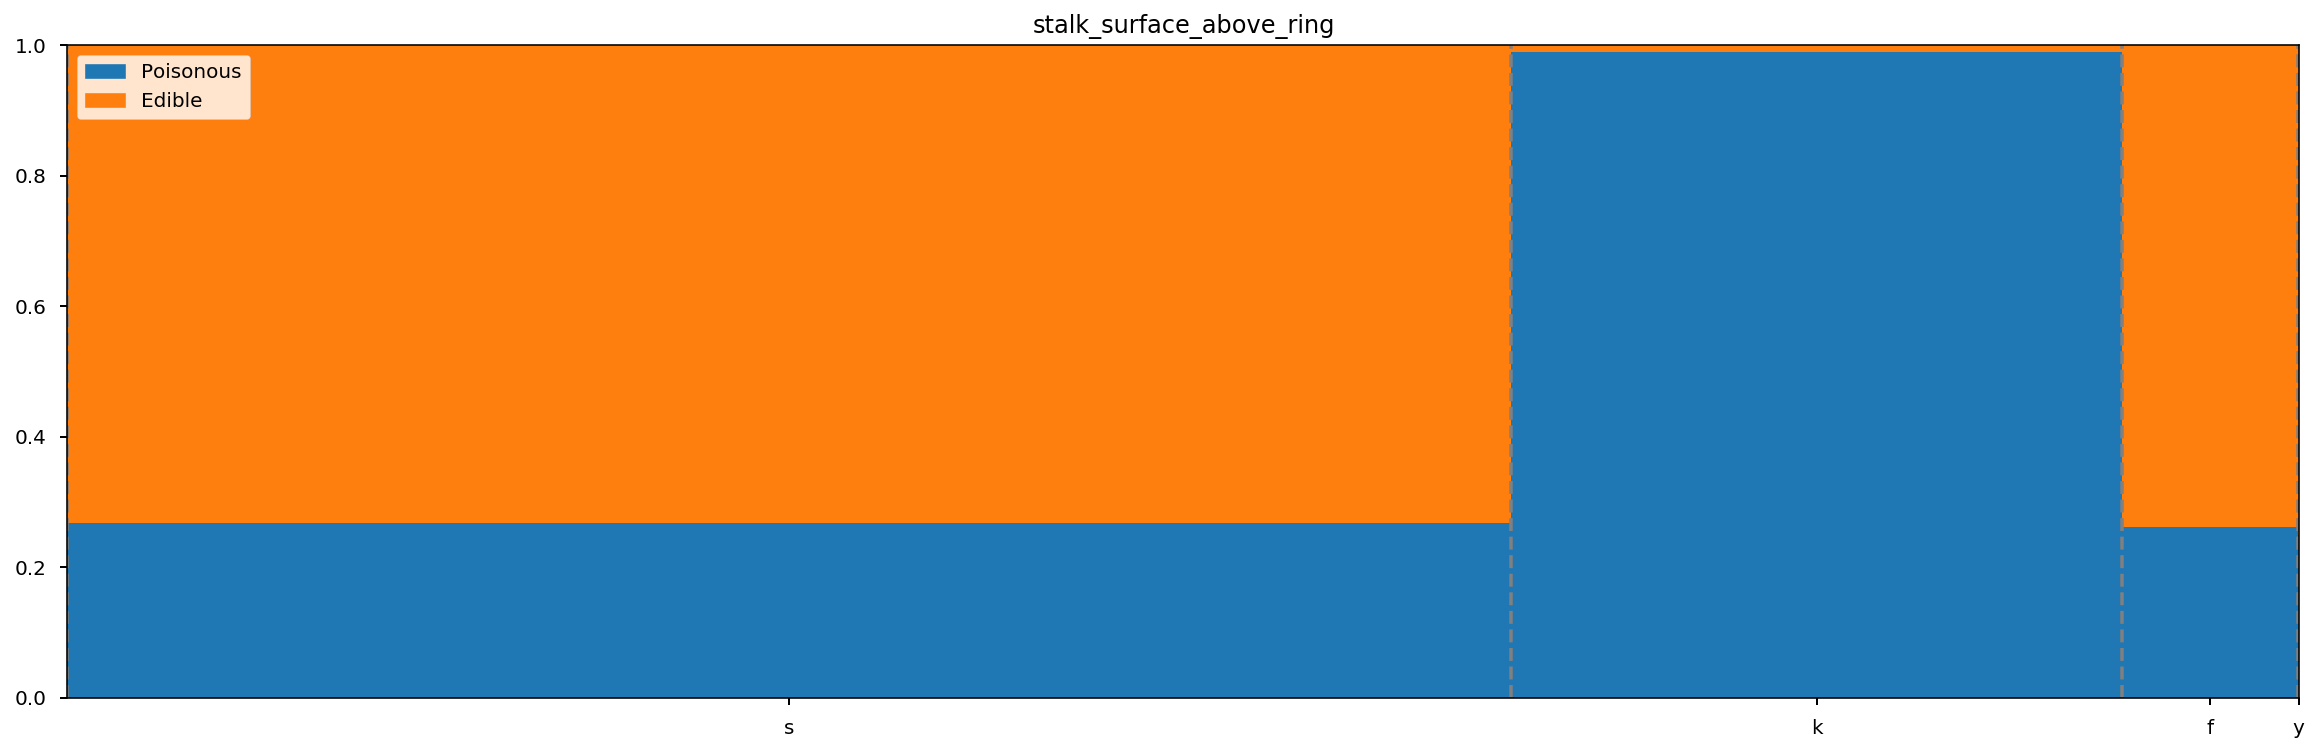

<Figure size 432x288 with 0 Axes>

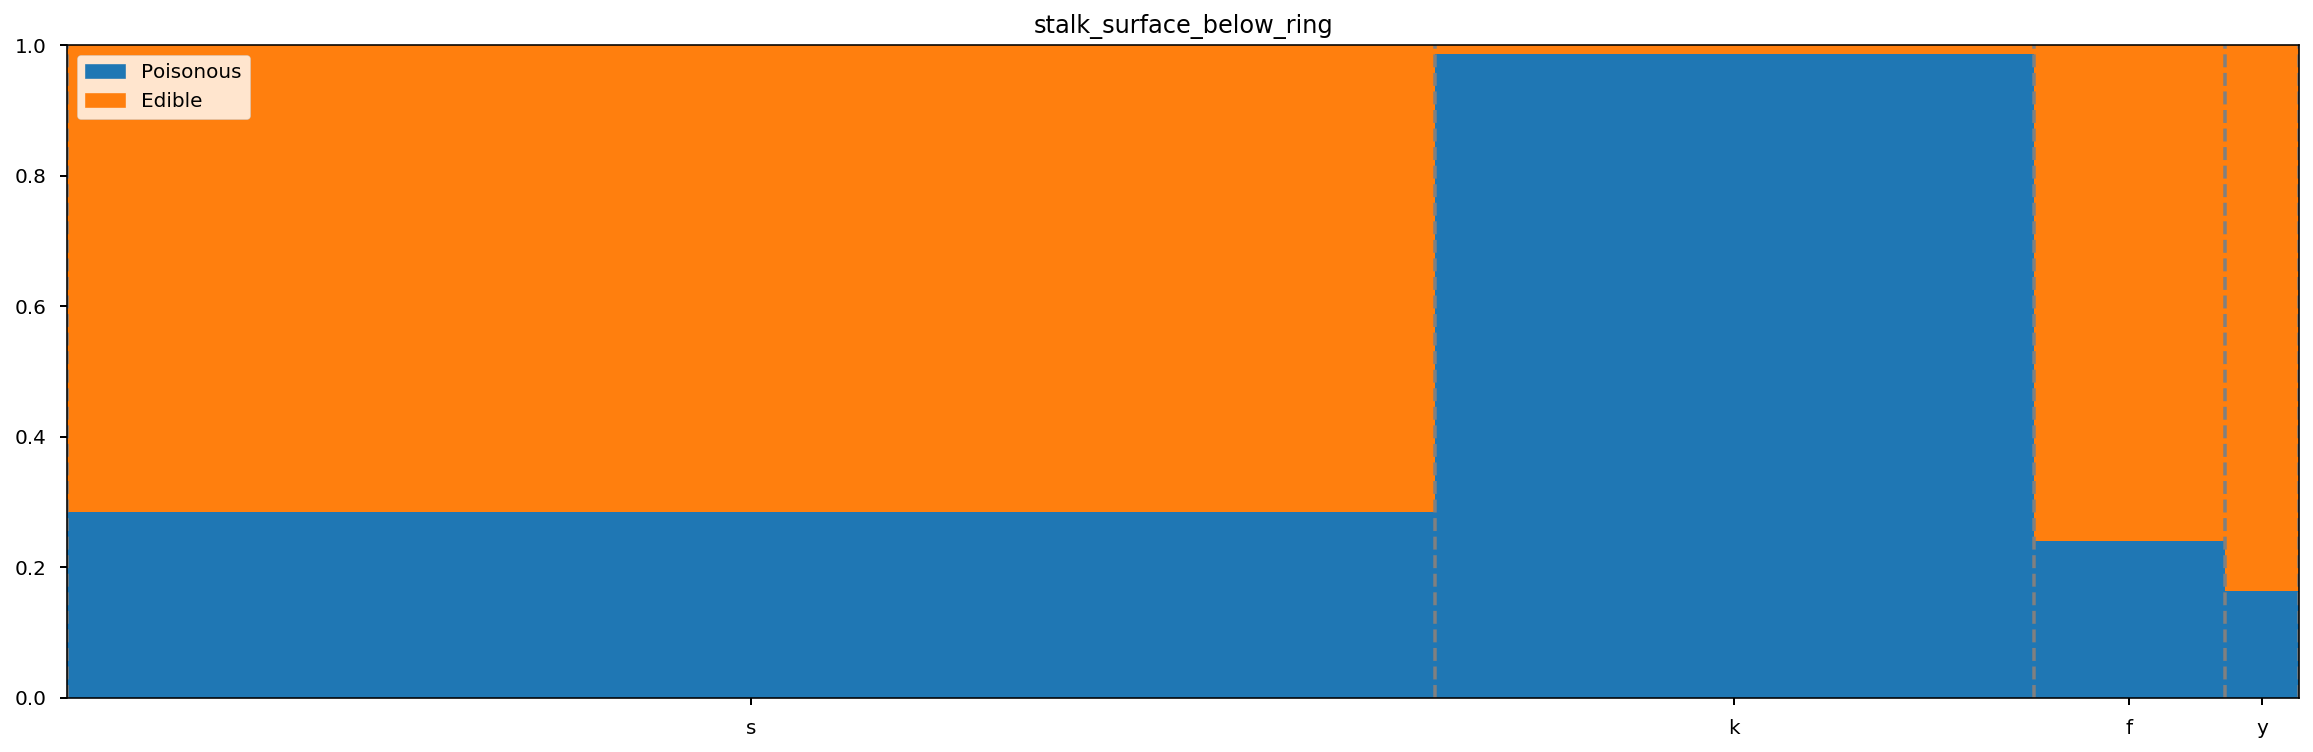

<Figure size 432x288 with 0 Axes>

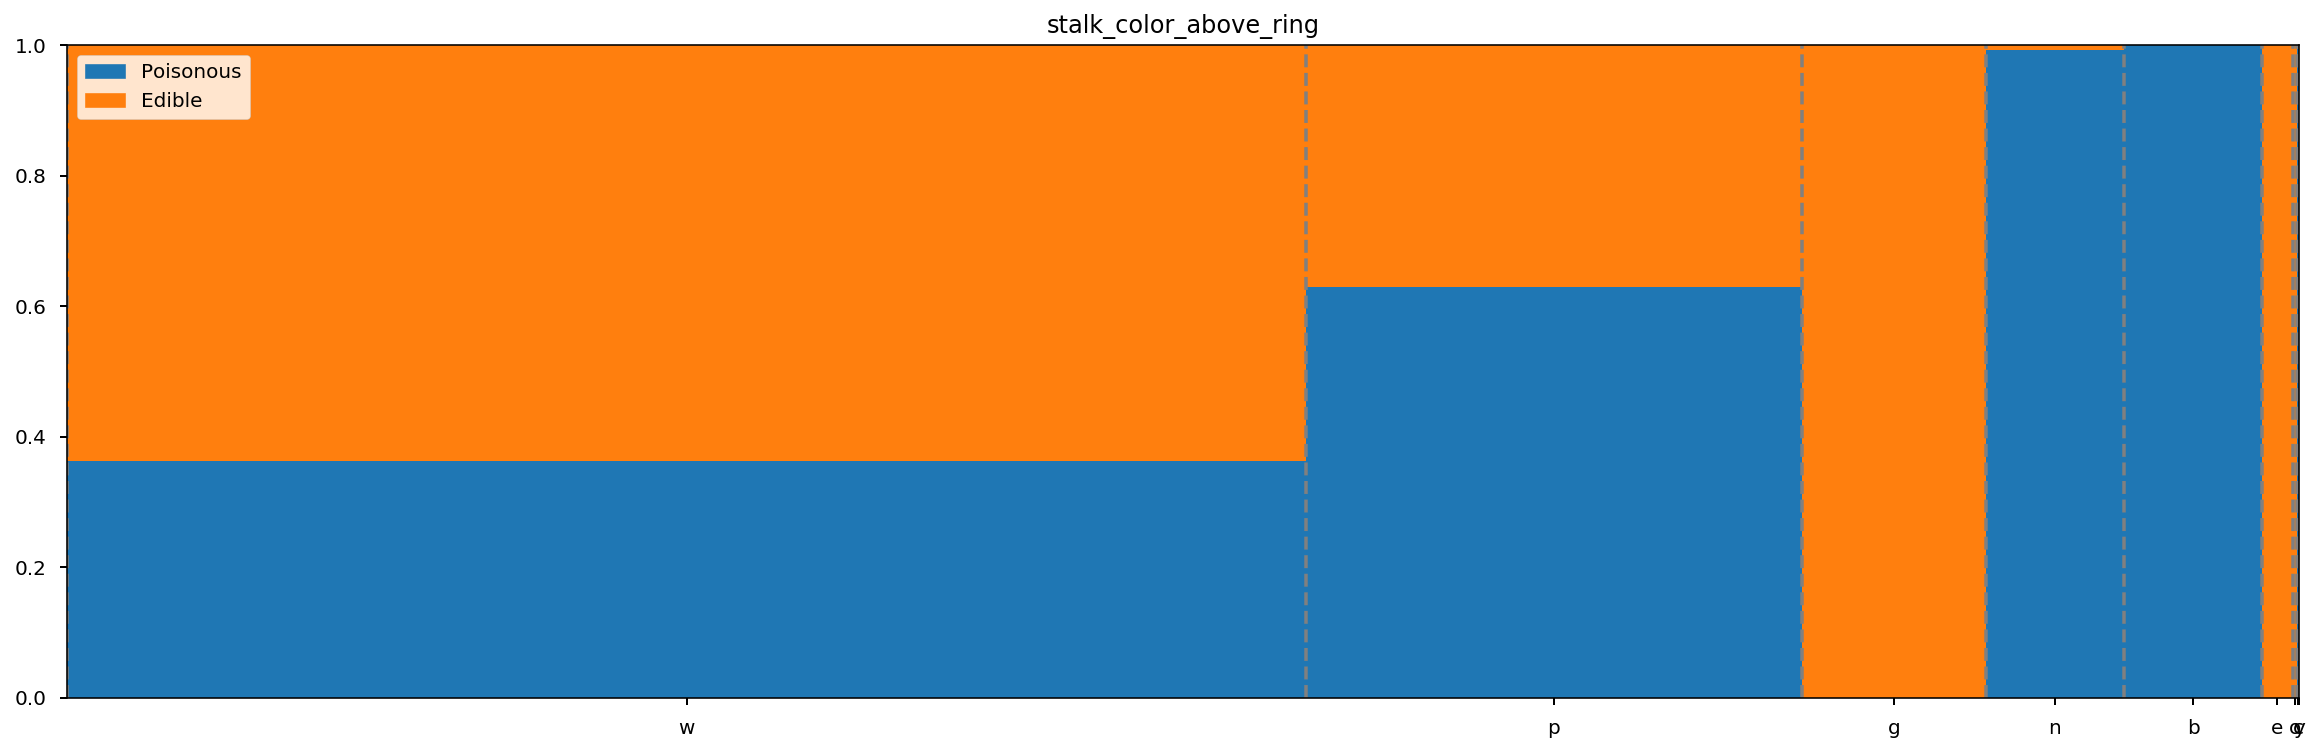

<Figure size 432x288 with 0 Axes>

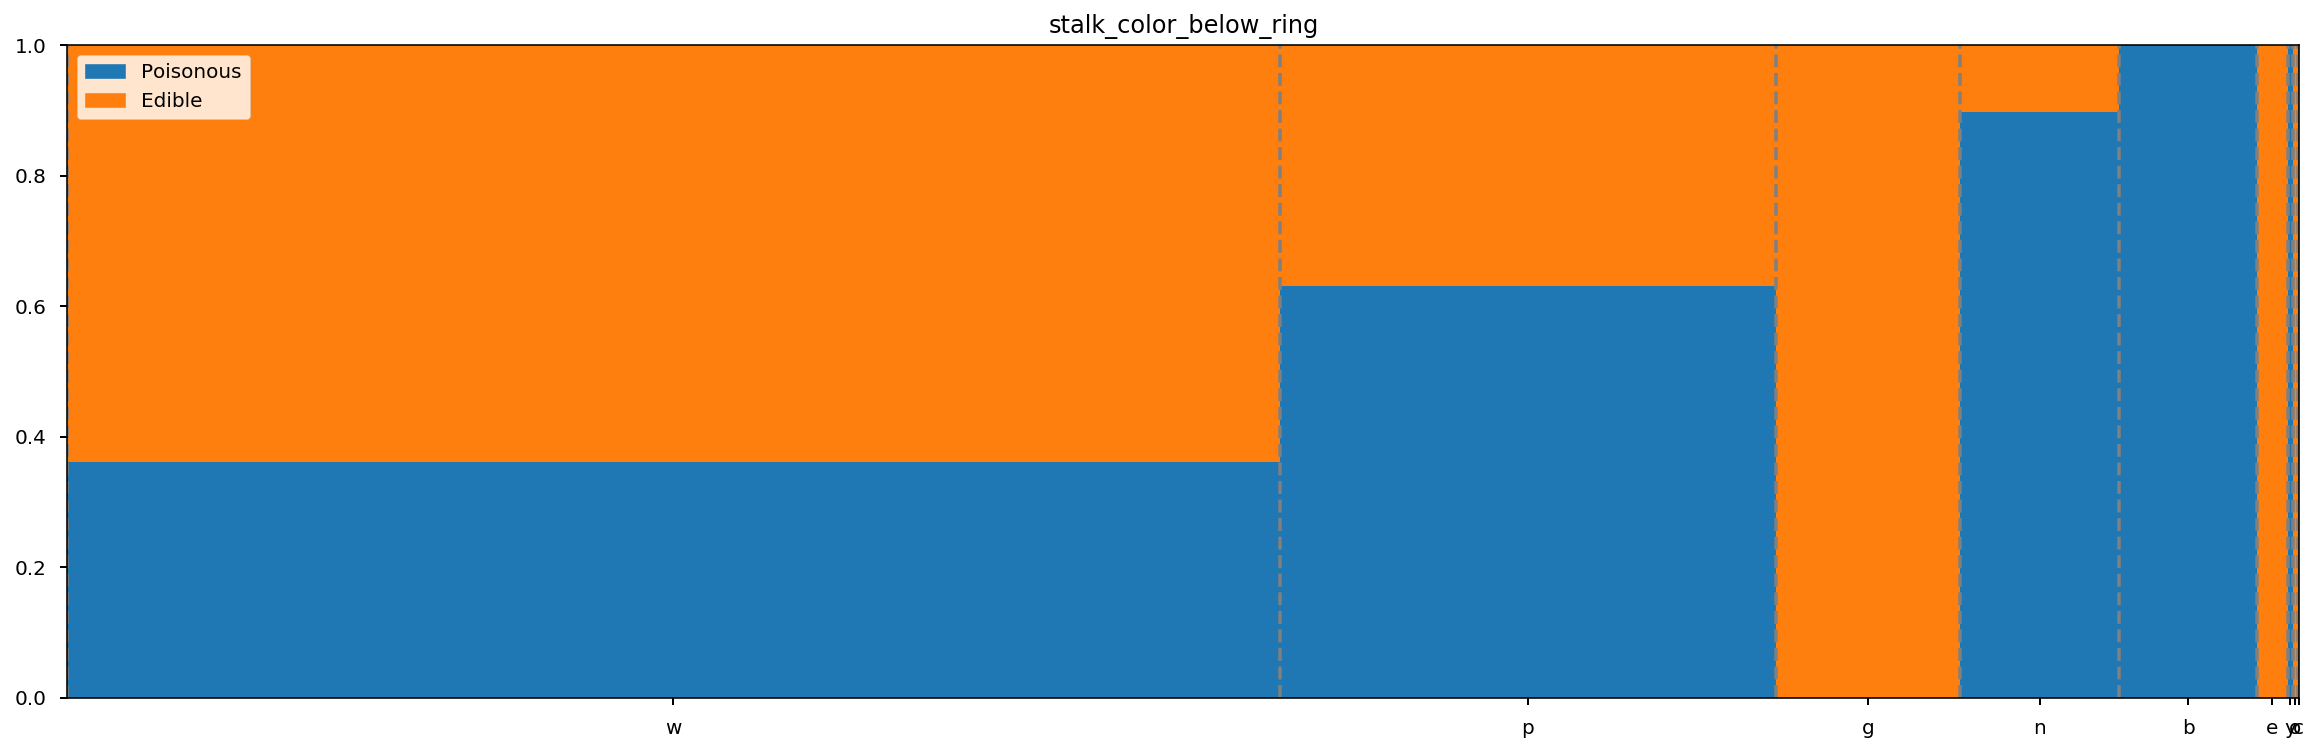

<Figure size 432x288 with 0 Axes>

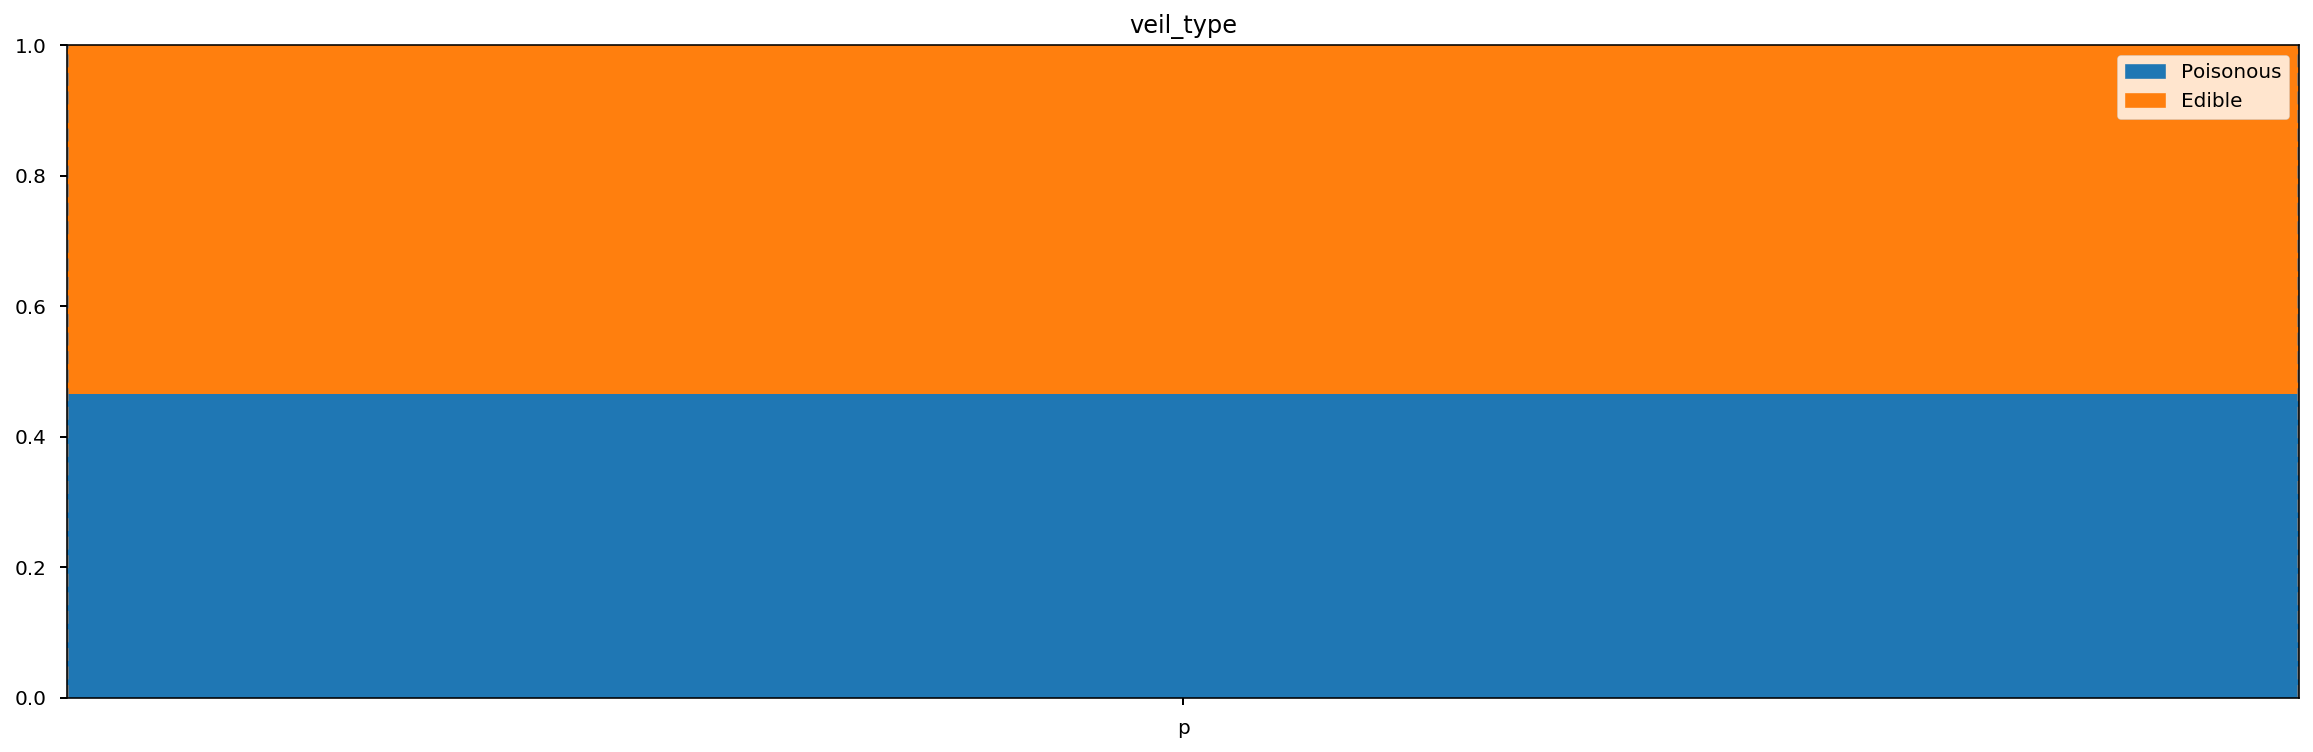

<Figure size 432x288 with 0 Axes>

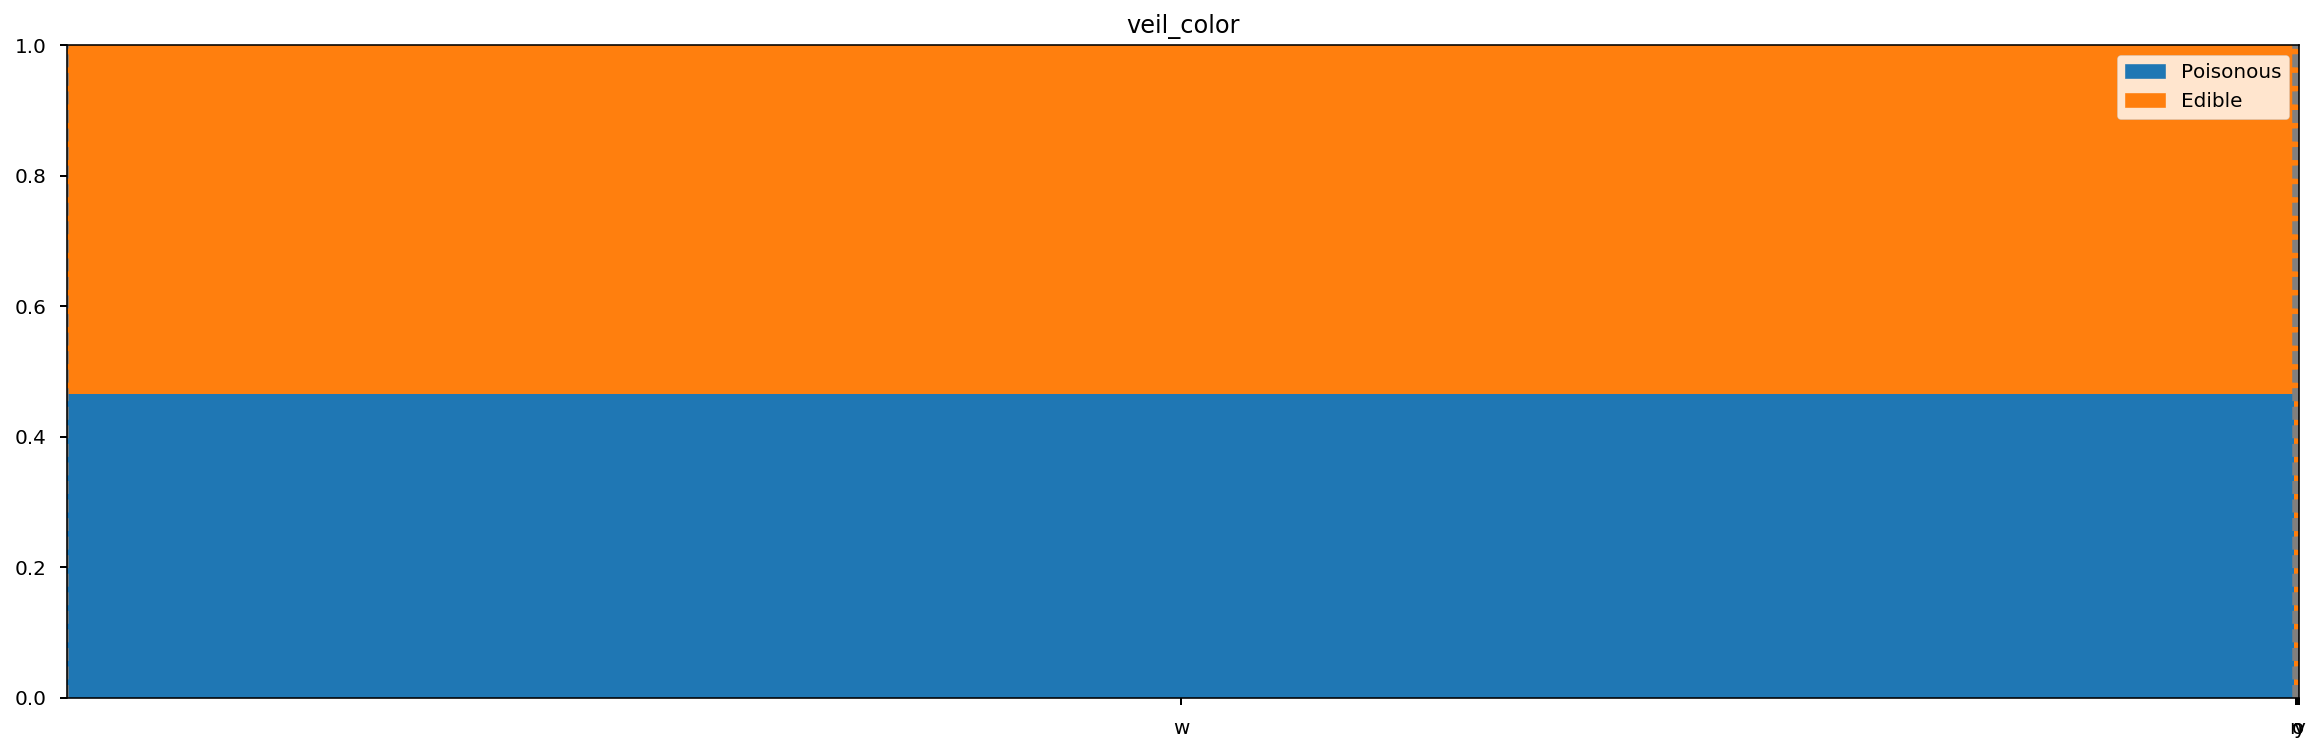

<Figure size 432x288 with 0 Axes>

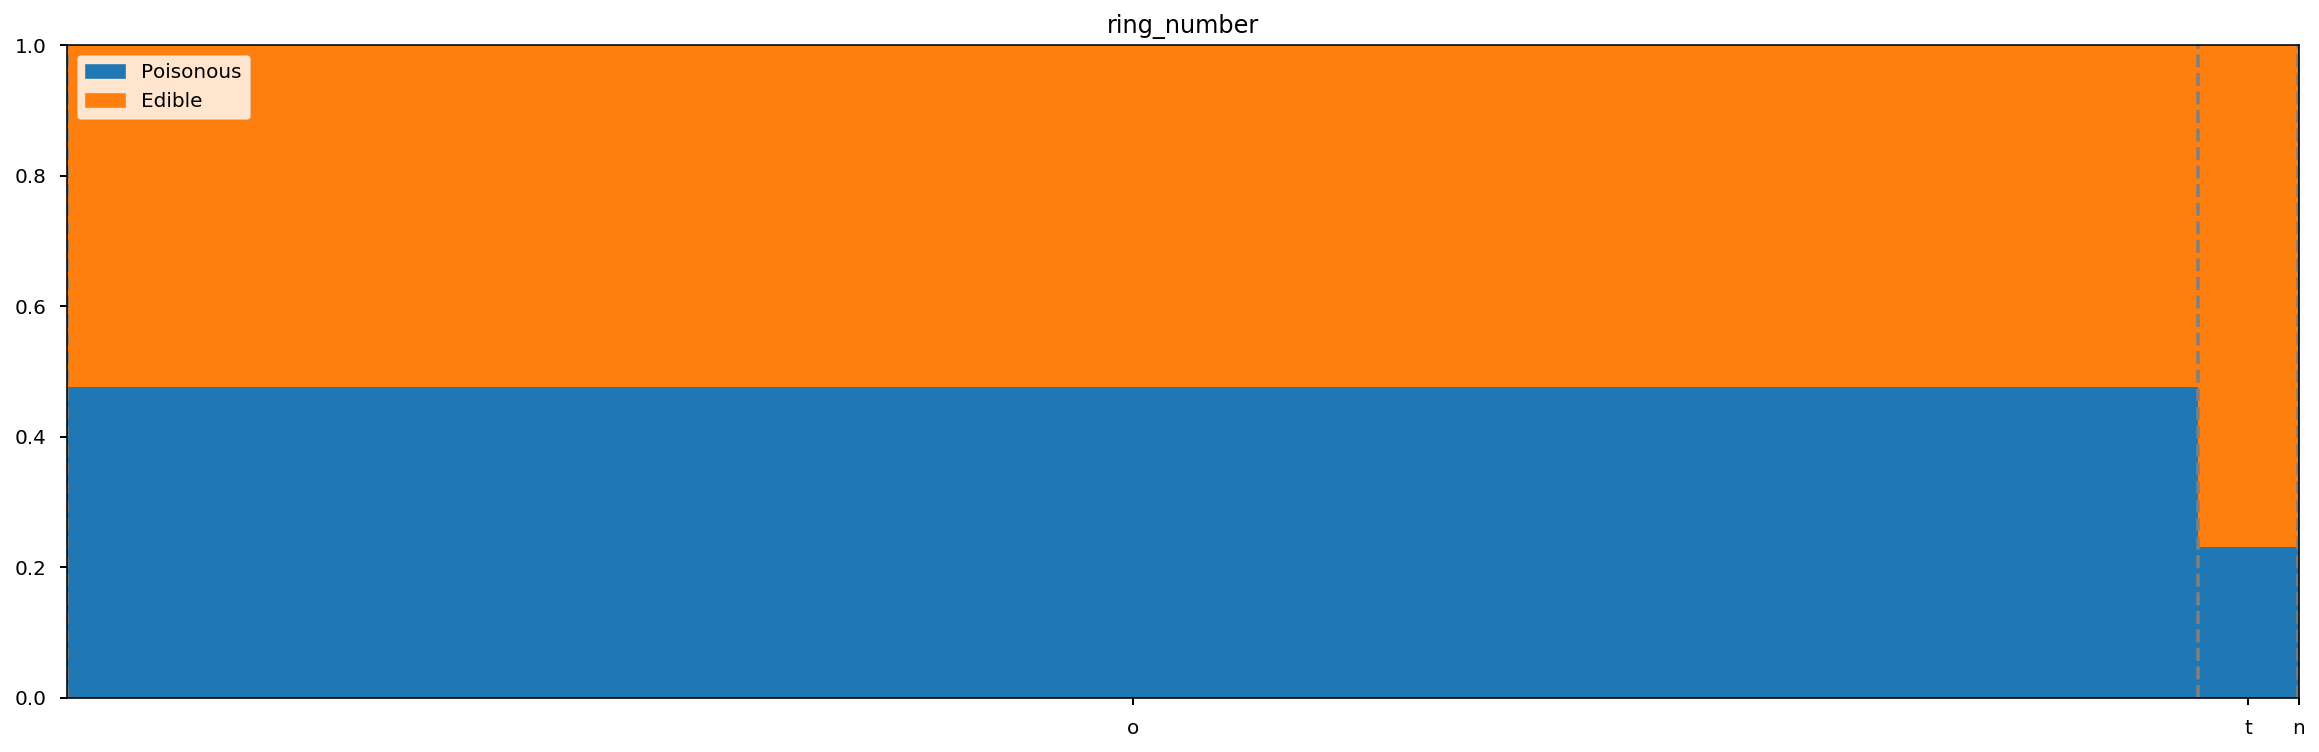

<Figure size 432x288 with 0 Axes>

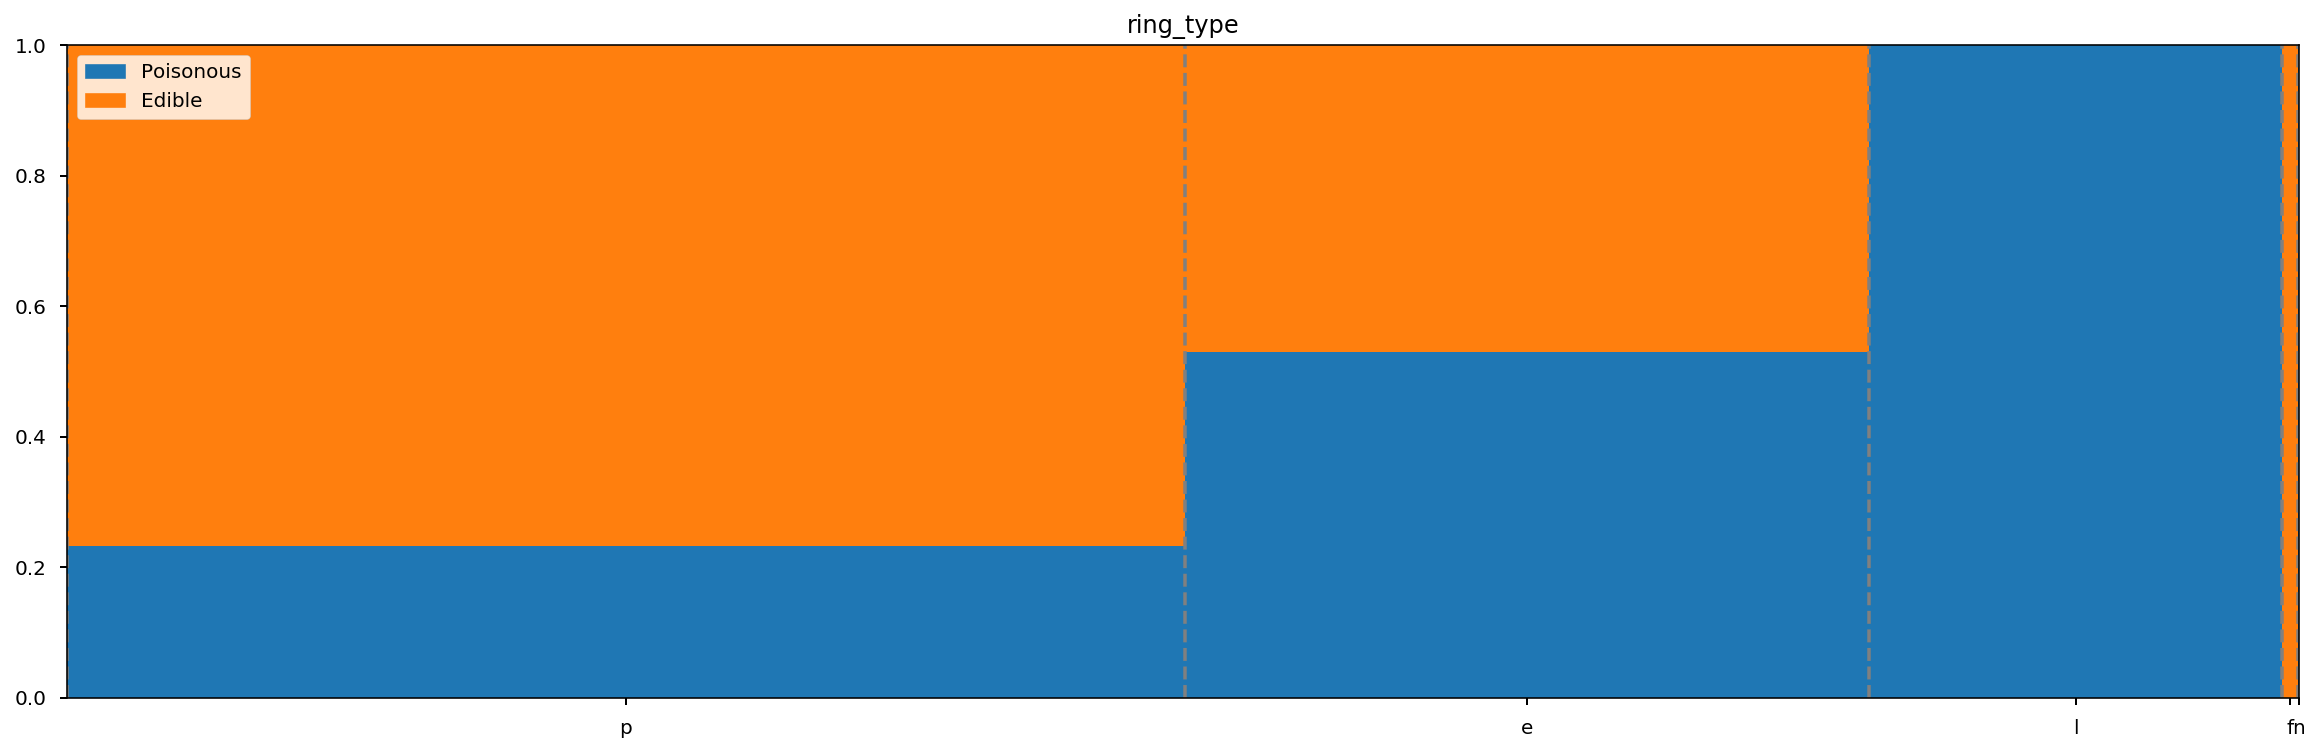

<Figure size 432x288 with 0 Axes>

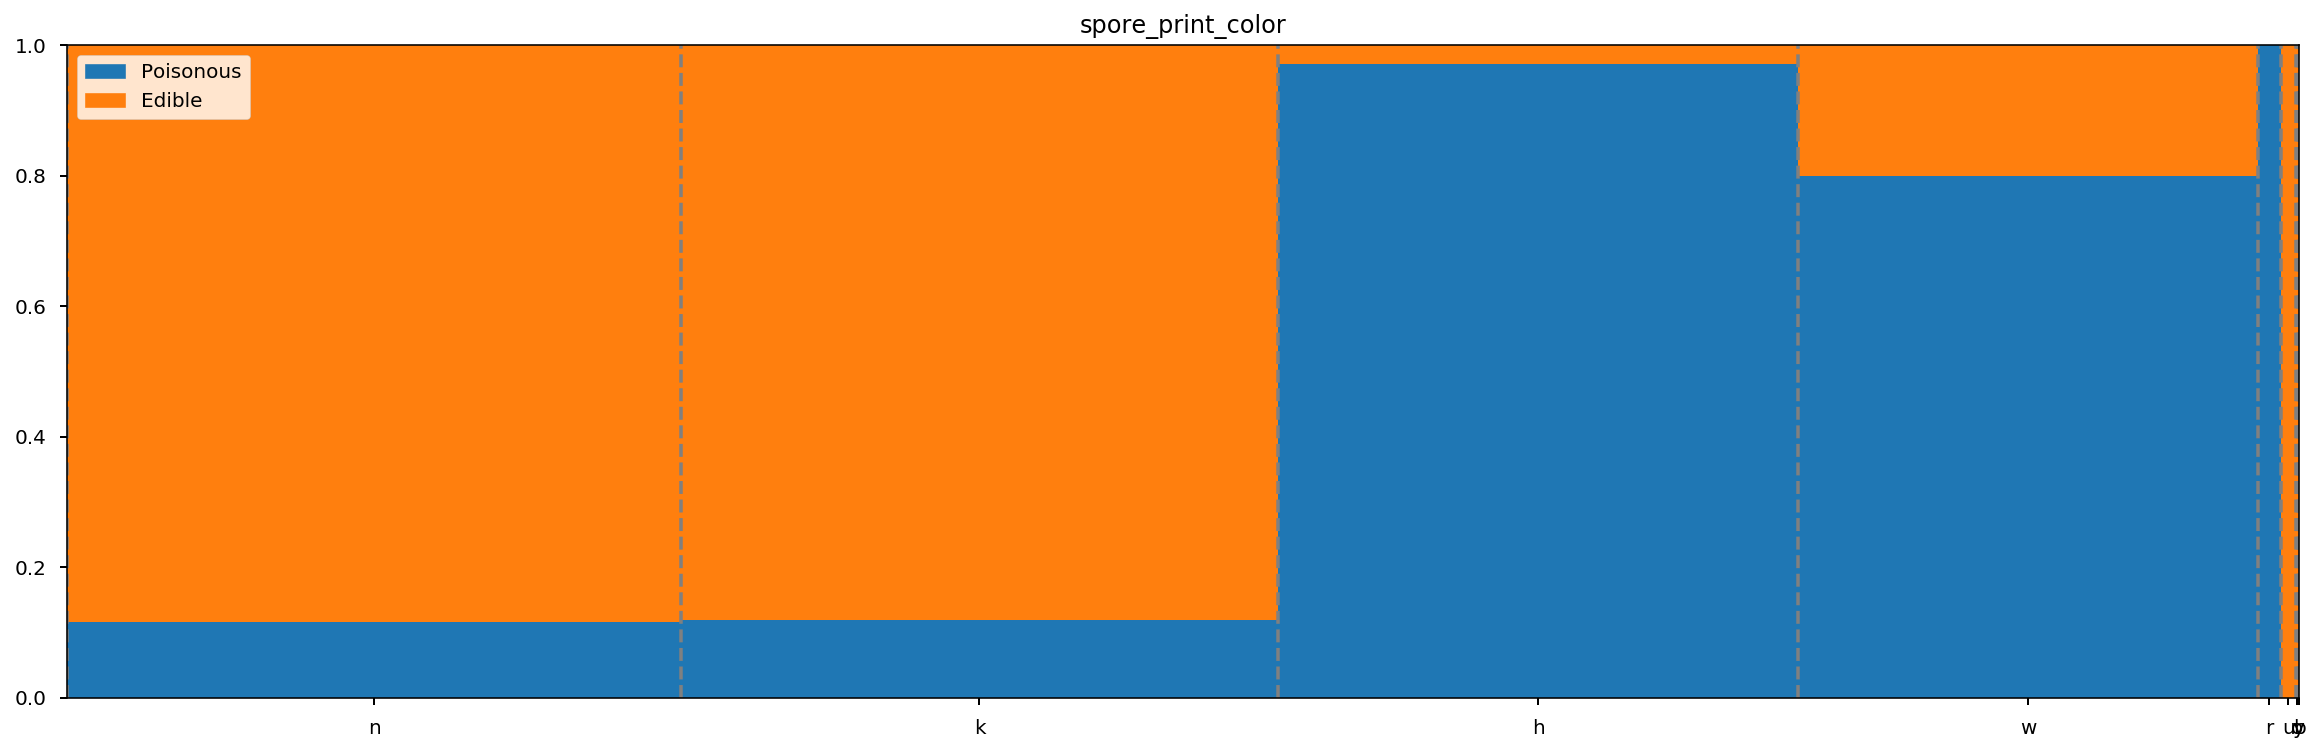

<Figure size 432x288 with 0 Axes>

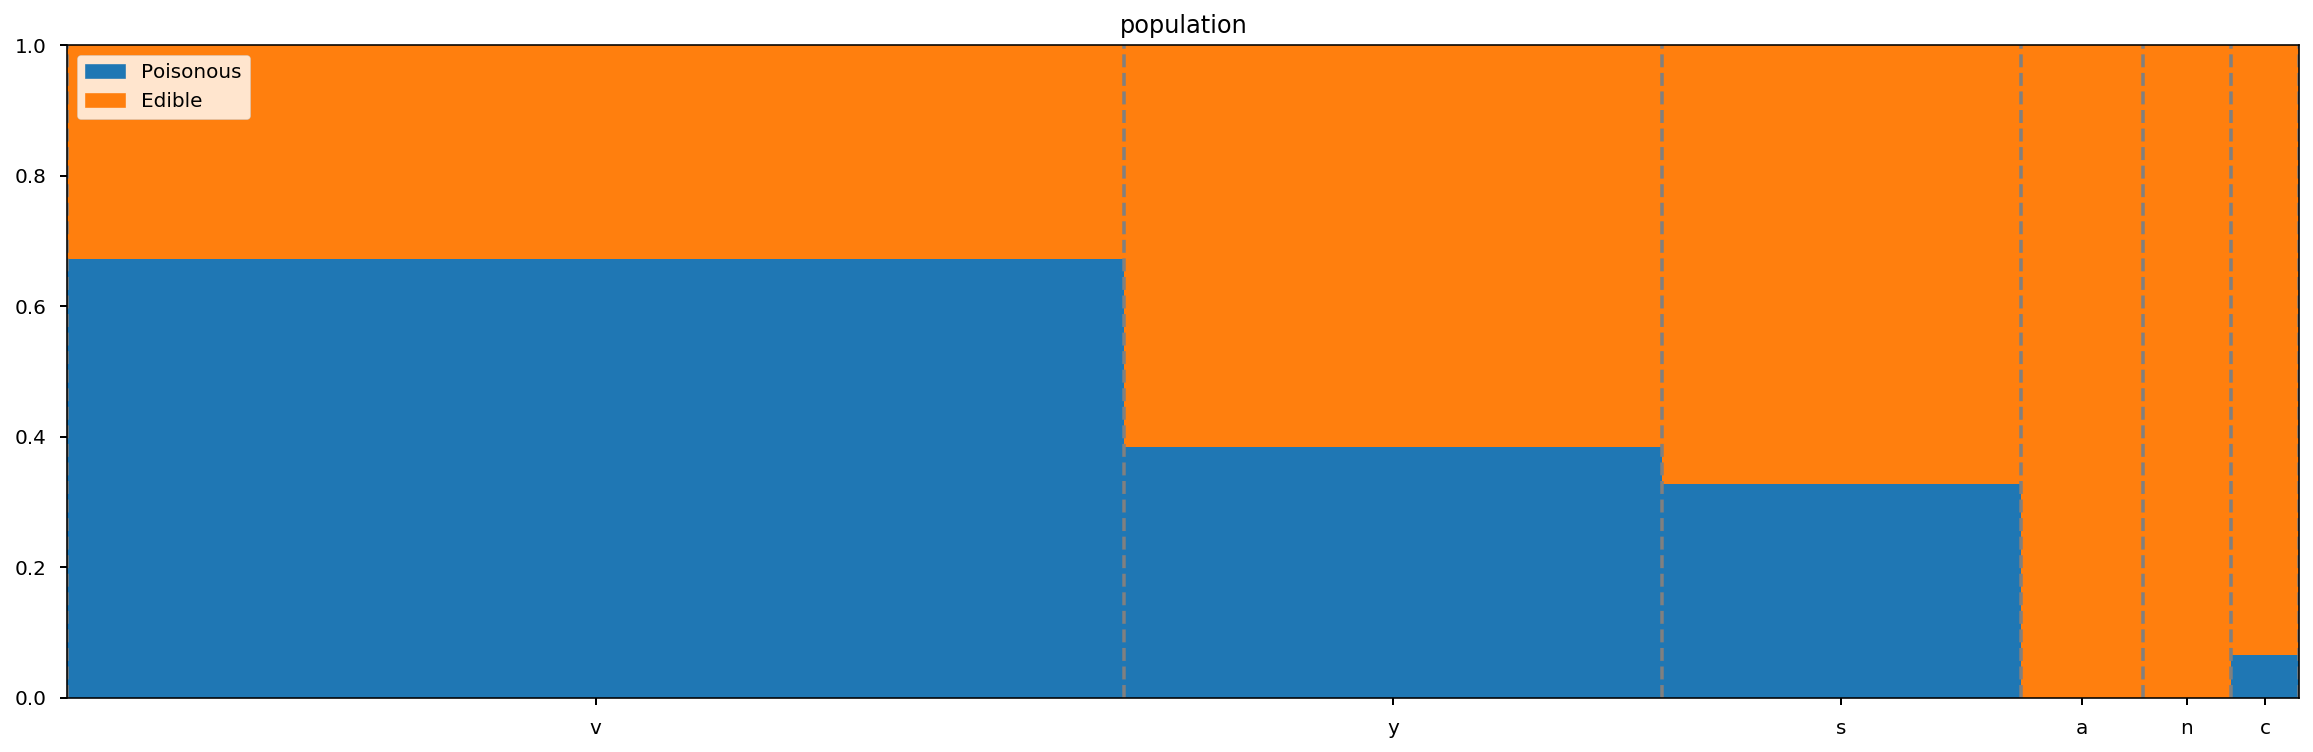

<Figure size 432x288 with 0 Axes>

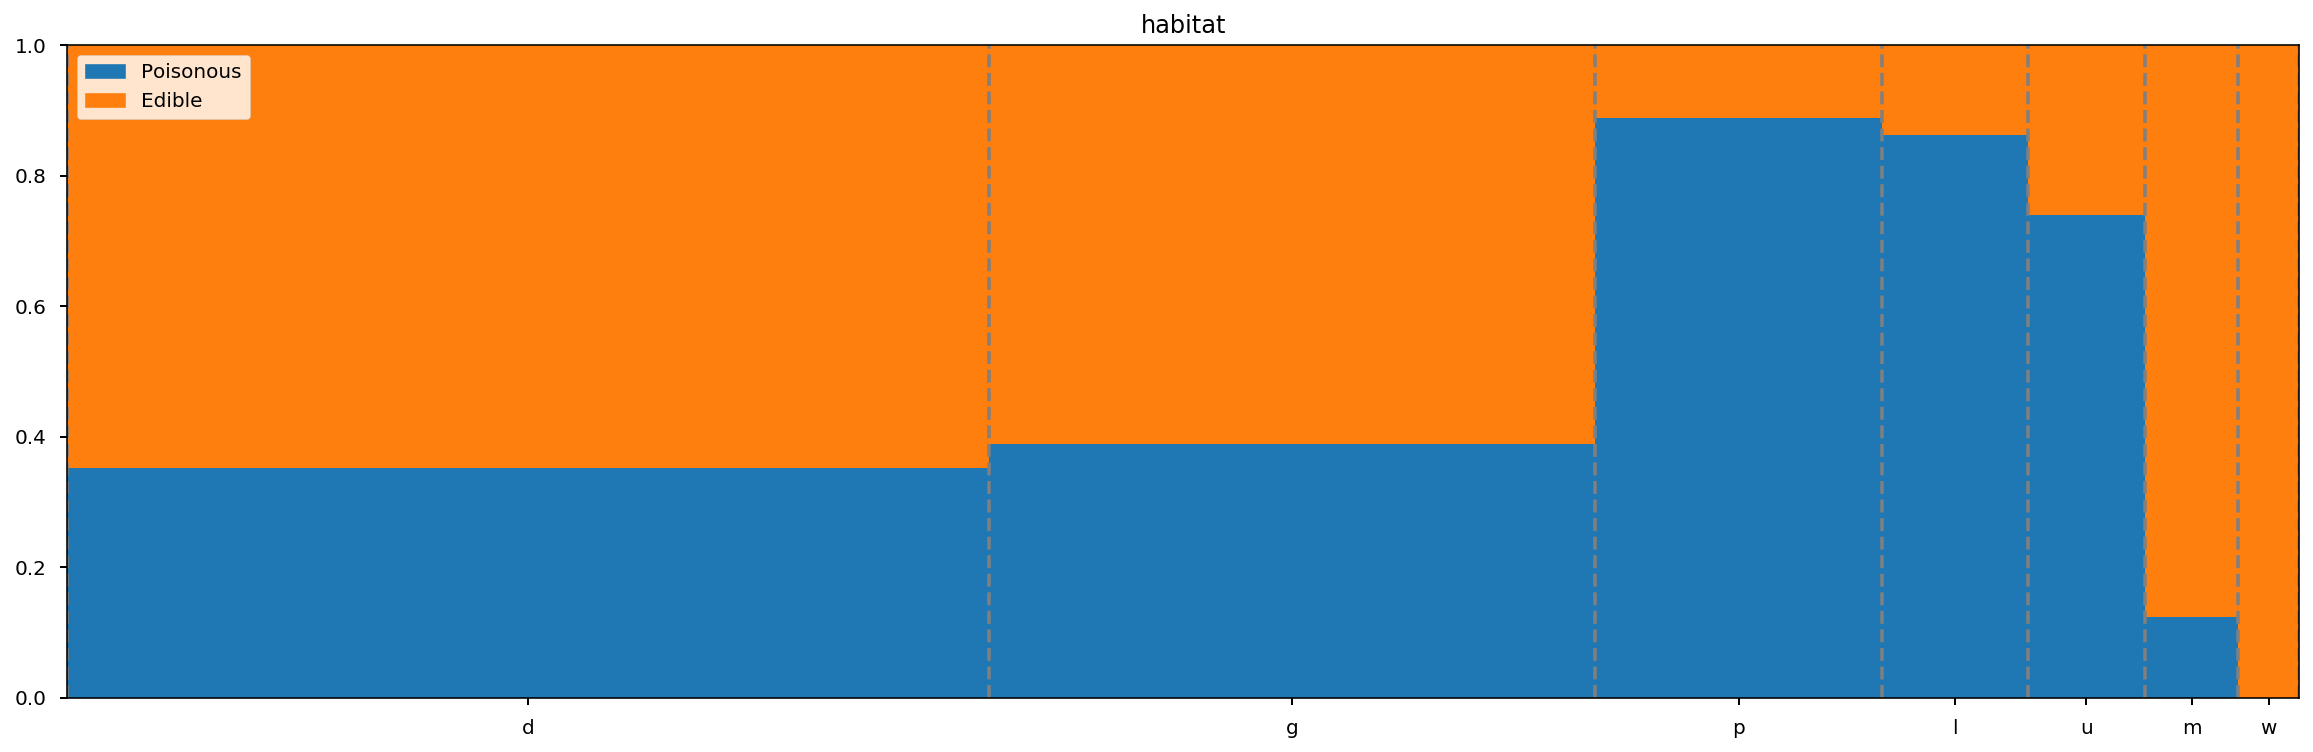

In [9]:
for col in df.columns:
    plt.figure()
    prekt.mushroom_plot(df[col], df.xclass, legend_map={'p': 'Poisonous', 'e': 'Edible'})

In [19]:
all_odors = df.odor.unique()
prob_dict = {o: sum((df.odor == o) & (df.xclass == 'e')) / sum(df.odor == o) for o in all_odors}
    
def simple_is_edible(mushroom):
    odor = mushroom.odor
    return prob_dict.get(odor, 0.)
    # mushroom should be stuff you get from df.itertuple
    #return probability of it being EDIBLE

In [17]:
for i, mushroom in enumerate(df.itertuples()):
    print(mushroom.odor, simple_is_edible(mushroom))
    if i > 100:
        break

p 0.0
a 1.0
l 1.0
p 0.0
n 0.963023560209424
a 1.0
a 1.0
l 1.0
p 0.0
a 1.0
l 1.0
a 1.0
a 1.0
p 0.0
n 0.963023560209424
n 0.963023560209424
n 0.963023560209424
p 0.0
p 0.0
p 0.0
a 1.0
p 0.0
l 1.0
a 1.0
l 1.0
p 0.0
a 1.0
l 1.0
n 0.963023560209424
a 1.0
l 1.0
p 0.0
l 1.0
l 1.0
l 1.0
l 1.0
n 0.963023560209424
p 0.0
a 1.0
l 1.0
a 1.0
l 1.0
n 0.963023560209424
p 0.0
a 1.0
a 1.0
l 1.0
l 1.0
l 1.0
l 1.0
a 1.0
l 1.0
l 1.0
p 0.0
p 0.0
a 1.0
n 0.963023560209424
a 1.0
l 1.0
a 1.0
n 0.963023560209424
a 1.0
l 1.0
l 1.0
l 1.0
n 0.963023560209424
l 1.0
a 1.0
a 1.0
n 0.963023560209424
l 1.0
l 1.0
l 1.0
a 1.0
a 1.0
l 1.0
l 1.0
l 1.0
p 0.0
a 1.0
n 0.963023560209424
p 0.0
n 0.963023560209424
n 0.963023560209424
l 1.0
n 0.963023560209424
a 1.0
l 1.0
l 1.0
n 0.963023560209424
n 0.963023560209424
l 1.0
a 1.0
l 1.0
n 0.963023560209424
a 1.0
l 1.0
a 1.0
a 1.0
a 1.0
n 0.963023560209424
l 1.0


In [21]:
# how many percentage of edible mushroom we predict as edible

true_positive = 0
for i, mushroom in enumerate(df.itertuples()):
    prob = simple_is_edible(mushroom)
    should_eat = prob > 0.5
    if should_eat and mushroom.xclass == 'e':
        true_positive += 1

print(true_positive, sum(df.xclass == 'e'), true_positive/sum(df.xclass == 'e'))

3743 3743 1.0


In [22]:
# how many percentage of poisonous mushroom we predict as poisonous

true_negative = 0
for i, mushroom in enumerate(df.itertuples()):
    prob = simple_is_edible(mushroom)
    should_not_eat = prob <= 0.5
    if should_not_eat and mushroom.xclass == 'p':
        true_negative += 1

print(true_negative, sum(df.xclass == 'p'), true_negative/sum(df.xclass == 'p'))

3143 3256 0.9652948402948403


#### 10) How should we draw the probability line whether to eat the mushroom or not? We will cover this later.

#### 11) What if we want to use more feature? What is 
$$
P(\text{edible} | \text{red cap} \cap \text{smooth surface} \cap \text{black spore})
$$

How would you implement the equivalent of simple_is_edible? Don't implement it though.

#### 12) What's wrong with look up table? This is called cursed of dimensionality.

#### Epilogue

Note that we have just made a classifier that can classify a poisonous mushroom from edible one to a certain degree.

We 1) learned something about mushroom plotting graph/printing values **then** 2) transfer the knowledge to computer. This is called *human learning*.

What we wish to do is to have computer automate the process of learning itself. That to have computer look up the data then figure out how to calculate the probability. 

(This kind of machine learning is called supervised machine learning for the fact that you supervise the computer on what's right)

### Naive Bayes Classifier

To make things more concrete let us look at the simplest generative model. Naive Bayes Classifier.

#### 1) What is the definition of Conditional Probability
$$P(A|B) = ???$$

Also revert that and find out what is
$$
P(A \cap B) = ???
$$

$$ P(\text{A} \cap \text{B}) = P(A|B) \times P(B) $$

#### 2) Let

- $R$ = Red Cap
- $S$ = Smooth Surface
- $B$ = Black spore 
- $E$ = Edible

Fill in the blank

$$
P(E | R \cap S \cap B ) = \frac{P(...)}{P(....)}
$$

$$ P(E | R \cap S \cap B ) = \frac{P(E \cap R \cap S \cap B)}{P(R \cap S \cap B)} $$

#### 3) What's wrong with using lookup table to calculate the term on the top. (ignore the term at the bottom for now)

Curse of dimensionality

#### 4) Simplify the term on the top
$$
P(R \cap S \cap B \cap E) = P(R| ...) \times P(...)
$$

$$
P(R \cap S \cap B \cap E) = P(R| S \cap B \cap E) \times P(S \cap B \cap E)
$$

#### 5) Simplify it further do it all the way
$$
P(R \cap S \cap B \cap E) = P(...|...) \times P(...|...) \times P(...|...)\times P(...)
$$

$$
P(R \cap S \cap B \cap E) = P(R|S \cap B \cap E) \times P(S|B \cap E) \times P(B|E)\times P(E)
$$

#### 6) Why is calculating it directly is a bad idea?

#### 7) What is Conditional Independence Assumption? Using this assumption what is now the
$$ P(R \cap S \cap B \cap E) = ...$$

$$
P(R \cap S \cap B \cap E) = P(R|E) \times P(B|E) \times P(S|E)\times P(E)
$$

#### 8) What is Prior?

$$
P(E)
$$

Prior is the probability of it being edible given that you don't even look at the mushroom

#### 9) The denominator is called the evidence term. Why is calculating this a bad idea?

Evidence is the probability of getting data with that feature, or you can think about it as probability normalization term.

#### 10) What do we know about

$$P(E| R \cap S \cap B) + P(\sim E| R \cap S \cap B)$$

$$P(E| R \cap S \cap B) + P(\sim E| R \cap S \cap B) = 1$$

#### 11) Show that
$$
P(R \cap S \cap B) = P(...|...)P(...|...)P(...|...)P(...|...)P(E) + P(...|...)P(...|...)P(...|...)P(...|...)P(\sim E)
$$

$$
P(R \cap S \cap B) = P(R|E)P(S|E)P(B|E)P(E) + P(R|\sim E)P(S|\sim E)P(B|\sim E)P(\sim E)
$$

#### 12) Implement the following
This will make your life a bit easier

In [6]:
class NaiveBayes:
    def __init__(self, df, class_col):
        #do something
        #you *may* want to cache every possible query for cond_prof. Up to you.
        self.df = df
        self.class_col = class_col # indicate poisonous/edible
        # feature_dict class_col -> col_name -> feature -> probability(col_name == feature | col)
       
        self.feature_columns = [col for col in df.columns if col != class_col]
        self.feature_dict = {}
        for class_val in df[class_col].unique():
            d = {}
            for col in self.feature_columns:
                d[col] = self._build_dict_for_column(col, class_val)
            self.feature_dict[class_val] = d
       
    def _build_dict_for_column(self, col_name, class_val) -> 'Dict[str -> prob]':
        ret = {}
        right_class = self.df[self.class_col]==class_val
        sum_right_class = sum(right_class)
        for col_value in self.df[col_name].unique():
            right_value = self.df[col_name] == col_value
            ret[col_value] = sum(right_class & right_value)/sum_right_class
        return ret
 
    #mushroom is stuff you got from itertuple
    def prob_edible(self, mushroom):
       
        #build the product P(x|E).P(y|E)...
        p_x_e = 1.
        p_x_p = 1.
        for col_name in self.feature_columns:
            col_value = getattr(mushroom, col_name)
            p_x_e *= self.feature_dict['e'][col_name].get(col_value, 0) # 0 ignores the other features on mushrooms we've never seen. This is a bad idea since there's a chance of division by 0
            p_x_p *= self.feature_dict['p'][col_name].get(col_value, 0)
        #print(p_x_e, p_x_p)
        #prior
        p_e = sum(self.df[self.class_col]=='e')
        p_p = sum(self.df[self.class_col]=='p')
       
        evidence = p_x_e * p_e + p_x_p * p_p
        return p_x_e * p_e / evidence
#         return P(edible | all mushroom features)

In [7]:
nb = NaiveBayes(df, 'xclass')
for i, mushroom in enumerate(df.itertuples()):
    #print(mushroom)
    print(i, mushroom.odor, nb.prob_edible(mushroom))
    

0 p 0.0
1 a 1.0
2 l 1.0
3 p 0.0
4 n 1.0
5 a 1.0
6 a 1.0
7 l 1.0
8 p 0.0
9 a 1.0
10 l 1.0
11 a 1.0
12 a 1.0
13 p 0.0
14 n 1.0
15 n 1.0
16 n 1.0
17 p 0.0
18 p 0.0
19 p 0.0
20 a 1.0
21 p 0.0
22 l 1.0
23 a 1.0
24 l 1.0
25 p 0.0
26 a 1.0
27 l 1.0
28 n 0.9992909525960066
29 a 1.0
30 l 1.0
31 p 0.0
32 l 1.0
33 l 1.0
34 l 1.0
35 l 1.0
36 n 1.0
37 p 0.0
38 a 1.0
39 l 1.0
40 a 1.0
41 l 1.0
42 n 0.9891250084889185
43 p 0.0
44 a 1.0
45 a 1.0
46 l 1.0
47 l 1.0
48 l 1.0
49 l 1.0
50 a 1.0
51 l 1.0
52 l 1.0
53 p 0.0
54 p 0.0
55 a 1.0
56 n 1.0
57 a 1.0
58 l 1.0
59 a 1.0
60 n 1.0
61 a 1.0
62 l 1.0
63 l 1.0
64 l 1.0
65 n 1.0
66 l 1.0
67 a 1.0
68 a 1.0
69 n 0.9872392769236444
70 l 1.0
71 l 1.0
72 l 1.0
73 a 1.0
74 a 1.0
75 l 1.0
76 l 1.0
77 l 1.0
78 p 0.0
79 a 1.0
80 n 0.9999971147716834
81 p 0.0
82 n 0.9993630248229599
83 n 0.9999988919836814
84 l 1.0
85 n 0.9999969073959318
86 a 1.0
87 l 1.0
88 l 1.0
89 n 1.0
90 n 0.9995529063356855
91 l 1.0
92 a 1.0
93 l 1.0
94 n 1.0
95 a 1.0
96 l 1.0
97 a 1.0
98 a 1.0

774 n 1.0
775 a 1.0
776 p 0.0
777 a 1.0
778 l 1.0
779 l 1.0
780 a 1.0
781 n 1.0
782 l 1.0
783 l 1.0
784 a 1.0
785 p 0.0
786 n 0.9984915571684225
787 l 1.0
788 p 0.0
789 l 1.0
790 l 1.0
791 l 1.0
792 a 1.0
793 a 1.0
794 p 0.0
795 p 0.0
796 l 1.0
797 n 0.9999665537324329
798 p 0.0
799 l 1.0
800 a 1.0
801 a 1.0
802 p 0.0
803 l 1.0
804 a 1.0
805 l 1.0
806 a 1.0
807 a 1.0
808 l 1.0
809 l 1.0
810 a 1.0
811 a 1.0
812 p 0.0
813 p 0.0
814 p 0.0
815 a 1.0
816 a 1.0
817 a 1.0
818 a 1.0
819 l 1.0
820 l 1.0
821 n 0.9970243447201332
822 a 1.0
823 l 1.0
824 a 1.0
825 l 1.0
826 l 1.0
827 a 1.0
828 l 1.0
829 l 1.0
830 n 1.0
831 a 1.0
832 l 1.0
833 l 1.0
834 l 1.0
835 p 0.0
836 l 1.0
837 p 0.0
838 a 1.0
839 a 1.0
840 a 1.0
841 p 0.0
842 a 1.0
843 n 1.0
844 a 1.0
845 n 0.9999987166821774
846 a 1.0
847 l 1.0
848 l 1.0
849 l 1.0
850 l 1.0
851 a 1.0
852 n 1.0
853 n 1.0
854 n 1.0
855 l 1.0
856 l 1.0
857 a 1.0
858 a 1.0
859 p 0.0
860 l 1.0
861 a 1.0
862 a 1.0
863 a 1.0
864 a 1.0
865 l 1.0
866 n 0.998459967485

1346 p 0.0
1347 n 0.9999914799971411
1348 n 1.0
1349 n 0.999985075766214
1350 n 1.0
1351 n 0.9999975896359448
1352 n 0.9999729129968771
1353 n 1.0
1354 n 1.0
1355 n 1.0
1356 n 0.9999993551164379
1357 n 1.0
1358 n 1.0
1359 n 0.9999982658234328
1360 n 1.0
1361 p 0.0
1362 n 1.0
1363 n 0.999990961282708
1364 n 1.0
1365 n 0.9999965305409552
1366 n 1.0
1367 n 1.0
1368 n 1.0
1369 n 1.0
1370 n 0.9999955695661866
1371 n 0.9999861838390764
1372 n 0.999989004607386
1373 l 1.0
1374 p 0.0
1375 p 0.0
1376 n 0.9999991675859149
1377 n 0.9999987009177551
1378 p 0.0
1379 n 0.9999953963882399
1380 p 0.0
1381 n 1.0
1382 p 0.0
1383 n 1.0
1384 n 1.0
1385 n 1.0
1386 n 0.9999987406543385
1387 n 0.9999789998485102
1388 n 1.0
1389 n 0.999999051506502
1390 n 1.0
1391 n 0.9999663094304693
1392 n 1.0
1393 n 0.9999892590420967
1394 n 0.9999986057765589
1395 n 0.999985621850219
1396 n 0.9999980789631839
1397 n 0.9999585964676223
1398 n 0.9999848609941162
1399 p 0.0
1400 n 0.9999974163909681
1401 a 1.0
1402 n 1.0
140

1973 n 0.999995085985655
1974 n 0.9999969613085216
1975 p 0.0
1976 n 1.0
1977 n 0.9999974696699074
1978 n 1.0
1979 n 1.0
1980 n 0.9999954551657431
1981 n 0.9999894182278005
1982 l 1.0
1983 n 0.9999895875856234
1984 n 1.0
1985 n 1.0
1986 n 1.0
1987 p 0.0
1988 n 0.9999795326384784
1989 p 0.0
1990 p 0.0
1991 n 0.9998094457545512
1992 n 1.0
1993 n 1.0
1994 n 1.0
1995 n 1.0
1996 n 0.9999864246902013
1997 n 1.0
1998 n 1.0
1999 n 0.9999975468711385
2000 n 1.0
2001 n 1.0
2002 n 1.0
2003 n 1.0
2004 p 0.0
2005 l 1.0
2006 p 0.0
2007 n 0.9999863800315446
2008 n 1.0
2009 p 0.0
2010 n 1.0
2011 n 0.9999993299089627
2012 n 1.0
2013 n 1.0
2014 n 0.9999990340705709
2015 n 1.0
2016 n 0.9999859502812963
2017 a 1.0
2018 a 1.0
2019 n 1.0
2020 n 0.999999380394036
2021 n 1.0
2022 n 1.0
2023 n 0.9999990215783384
2024 n 0.9999991616690356
2025 n 0.9999777247124406
2026 n 1.0
2027 n 0.9999927831774378
2028 n 1.0
2029 l 1.0
2030 n 0.9999849954517503
2031 n 0.9999651579825544
2032 n 0.9999807049376521
2033 n 1.0
2

2455 n 0.9998469853107026
2456 n 1.0
2457 n 0.9999788973156248
2458 n 1.0
2459 n 0.9999631298446501
2460 n 0.9999839890797094
2461 n 0.999992997679016
2462 n 1.0
2463 n 0.9999846048631743
2464 n 0.9999980473985082
2465 n 1.0
2466 n 1.0
2467 n 0.9998856488682533
2468 n 0.9999942275578275
2469 n 1.0
2470 n 1.0
2471 n 1.0
2472 n 1.0
2473 n 0.9999624970698766
2474 n 0.9999649559515706
2475 n 0.9999828564340786
2476 n 1.0
2477 n 1.0
2478 p 0.0
2479 n 0.9999973264524842
2480 n 1.0
2481 n 1.0
2482 c 0.0
2483 n 0.9999736412910722
2484 n 1.0
2485 n 0.9999914184972942
2486 n 1.0
2487 n 0.9999975781920022
2488 n 1.0
2489 n 1.0
2490 n 0.9999473693582975
2491 n 1.0
2492 n 0.9999820119942769
2493 n 0.9999621700864388
2494 n 1.0
2495 p 0.0
2496 n 0.999999347437574
2497 n 1.0
2498 n 0.9999715247118685
2499 n 1.0
2500 n 0.9999720583337667
2501 n 1.0
2502 n 0.9999520934870365
2503 n 1.0
2504 n 1.0
2505 n 0.9999867069678205
2506 n 0.9999661402538674
2507 n 0.9999948497597837
2508 n 0.9999928227555663
250

2928 n 1.0
2929 n 0.9999844030355781
2930 n 1.0
2931 n 0.9999992066138825
2932 n 1.0
2933 n 0.9999365192087575
2934 n 1.0
2935 n 0.9999863829930316
2936 n 1.0
2937 f 0.0
2938 n 0.9999981460109241
2939 n 1.0
2940 n 1.0
2941 n 1.0
2942 n 0.9999848570963155
2943 n 1.0
2944 n 1.0
2945 n 0.9999886837802919
2946 n 1.0
2947 n 0.9999351832532932
2948 n 1.0
2949 n 0.9999951808191316
2950 n 0.9999399563596334
2951 n 1.0
2952 n 0.999997478042233
2953 n 1.0
2954 n 1.0
2955 n 0.9999923993217306
2956 n 1.0
2957 n 1.0
2958 n 0.9999937487334172
2959 n 1.0
2960 n 1.0
2961 n 1.0
2962 n 0.9999962689854991
2963 n 1.0
2964 n 0.9999965547683803
2965 n 1.0
2966 n 0.9999988769473274
2967 n 1.0
2968 n 1.0
2969 n 1.0
2970 n 1.0
2971 n 0.9999744288052096
2972 n 0.9999609764706986
2973 n 0.99999812984564
2974 n 0.9999950504516772
2975 n 0.9999896013296121
2976 n 0.9999539359254008
2977 n 1.0
2978 n 1.0
2979 n 1.0
2980 n 0.9999854544077268
2981 n 0.9999368589843891
2982 n 1.0
2983 n 0.9999932188180582
2984 n 1.0
2

3479 f 0.0
3480 n 0.9999514859227375
3481 n 1.0
3482 n 0.9999968421958385
3483 c 0.0
3484 c 0.0
3485 n 0.9999779560666896
3486 n 0.99997765529793
3487 n 1.0
3488 f 0.0
3489 n 1.0
3490 f 0.0
3491 n 1.0
3492 f 0.0
3493 n 0.9999844178293487
3494 n 0.9999991123272449
3495 n 0.9999902435548063
3496 f 0.0
3497 n 1.0
3498 n 1.0
3499 n 1.0
3500 c 0.0
3501 n 0.999979401399279
3502 n 0.9999905512452187
3503 n 1.0
3504 n 1.0
3505 n 0.999988119868029
3506 f 0.0
3507 n 0.9999900145817154
3508 f 0.0
3509 n 1.0
3510 n 0.9999183807430893
3511 f 0.0
3512 n 0.9999878310539071
3513 f 0.0
3514 n 0.9999633928948379
3515 c 0.0
3516 n 0.9999843339742667
3517 n 1.0
3518 n 1.0
3519 n 0.9999815358848168
3520 n 1.0
3521 c 0.0
3522 f 0.0
3523 n 0.9999780740598642
3524 n 1.0
3525 c 0.0
3526 n 1.0
3527 n 0.9998764326448066
3528 n 0.9999632141640676
3529 n 0.9999959465483257
3530 n 1.0
3531 c 0.0
3532 n 1.0
3533 f 0.0
3534 n 0.9999086690994826
3535 n 1.0
3536 c 0.0
3537 n 0.9999634110624096
3538 n 0.9999871344169168

4031 c 0.0
4032 f 0.0
4033 n 0.9999777638653475
4034 f 0.0
4035 f 0.0
4036 f 0.0
4037 f 0.0
4038 f 0.0
4039 n 1.0
4040 f 0.0
4041 n 0.9999964518379648
4042 f 0.0
4043 f 0.0
4044 f 0.0
4045 c 0.0
4046 f 0.0
4047 n 1.0
4048 c 0.0
4049 f 0.0
4050 f 0.0
4051 c 0.0
4052 f 0.0
4053 f 0.0
4054 n 1.0
4055 f 0.0
4056 f 0.0
4057 c 0.0
4058 c 0.0
4059 n 0.9999904833467957
4060 f 0.0
4061 n 0.999999230882145
4062 n 0.9999877058318475
4063 f 0.0
4064 f 0.0
4065 f 0.0
4066 f 0.0
4067 f 0.0
4068 n 0.9999635888365477
4069 f 0.0
4070 f 0.0
4071 f 0.0
4072 f 0.0
4073 n 1.0
4074 n 1.0
4075 f 0.0
4076 n 1.0
4077 n 0.9999964825076001
4078 f 0.0
4079 f 0.0
4080 f 0.0
4081 f 0.0
4082 f 0.0
4083 f 0.0
4084 f 0.0
4085 f 0.0
4086 f 0.0
4087 n 1.0
4088 f 0.0
4089 n 1.0
4090 f 0.0
4091 f 0.0
4092 n 0.9999986144798173
4093 n 1.0
4094 f 0.0
4095 n 0.9999368276336987
4096 n 0.9999802040629676
4097 f 0.0
4098 c 0.0
4099 f 0.0
4100 y 0.0
4101 f 0.0
4102 f 0.0
4103 n 0.9999951993182785
4104 f 0.0
4105 n 1.0
4106 n 0.0


4799 n 0.999999117078735
4800 f 0.0
4801 f 0.0
4802 f 0.0
4803 f 0.0
4804 f 0.0
4805 f 0.0
4806 n 1.0
4807 f 0.0
4808 f 0.0
4809 f 0.0
4810 f 0.0
4811 f 0.0
4812 n 1.0
4813 f 0.0
4814 n 0.0004249232836854635
4815 f 0.0
4816 f 0.0
4817 s 0.0
4818 f 0.0
4819 f 0.0
4820 f 0.0
4821 f 0.0
4822 f 0.0
4823 f 0.0
4824 n 1.0
4825 f 0.0
4826 n 0.001157681859119193
4827 f 0.0
4828 f 0.0
4829 f 0.0
4830 f 0.0
4831 n 1.0
4832 f 0.0
4833 f 0.0
4834 n 0.10172610994267062
4835 c 0.0
4836 f 0.0
4837 f 0.0
4838 f 0.0
4839 f 0.0
4840 n 0.0
4841 f 0.0
4842 n 0.9999944854168972
4843 n 0.0
4844 n 1.0
4845 f 0.0
4846 n 1.0
4847 f 0.0
4848 f 0.0
4849 f 0.0
4850 f 0.0
4851 f 0.0
4852 f 0.0
4853 f 0.0
4854 f 0.0
4855 f 0.0
4856 f 0.0
4857 f 0.0
4858 n 1.0
4859 n 1.0
4860 n 1.0
4861 f 0.0
4862 n 0.9999738924834313
4863 f 0.0
4864 f 0.0
4865 f 0.0
4866 f 0.0
4867 f 0.0
4868 f 0.0
4869 f 0.0
4870 f 0.0
4871 n 1.0
4872 n 1.0
4873 f 0.0
4874 f 0.0
4875 f 0.0
4876 n 0.9999900638014831
4877 f 0.0
4878 f 0.0
4879 f 0.0

5541 f 0.0
5542 f 0.0
5543 f 0.0
5544 n 1.0
5545 f 0.0
5546 n 0.6528067348069979
5547 n 0.0982754500949252
5548 n 0.0
5549 y 0.0
5550 f 0.0
5551 n 1.0
5552 f 0.0
5553 n 1.0
5554 y 0.0
5555 f 0.0
5556 n 1.0
5557 n 1.0
5558 s 0.0
5559 f 0.0
5560 f 0.0
5561 f 0.0
5562 n 1.0
5563 n 1.0
5564 f 0.0
5565 f 0.0
5566 n 0.0
5567 f 0.0
5568 f 0.0
5569 n 1.0
5570 n 1.0
5571 n 0.0
5572 f 0.0
5573 y 0.0
5574 f 0.0
5575 f 0.0
5576 s 0.0
5577 n 0.0
5578 n 0.7073722474925813
5579 f 0.0
5580 f 0.0
5581 f 0.0
5582 n 0.12145130392904922
5583 y 0.0
5584 f 0.0
5585 y 0.0
5586 n 1.0
5587 n 0.0
5588 n 1.0
5589 y 0.0
5590 f 0.0
5591 f 0.0
5592 f 0.0
5593 n 0.0
5594 s 0.0
5595 s 0.0
5596 n 1.0
5597 f 0.0
5598 n 0.7529309240850058
5599 n 1.0
5600 y 0.0
5601 n 0.117419006378276
5602 f 0.0
5603 s 0.0
5604 n 1.0
5605 n 0.0
5606 f 0.0
5607 f 0.0
5608 n 0.12079905394990313
5609 f 0.0
5610 n 0.0
5611 f 0.0
5612 n 1.0
5613 f 0.0
5614 s 0.0
5615 y 0.0
5616 f 0.0
5617 n 0.0
5618 f 0.0
5619 n 1.0
5620 n 0.8459121821154758

6257 s 0.0
6258 s 0.0
6259 y 0.0
6260 f 0.0
6261 n 0.290894232679849
6262 y 0.0
6263 s 0.0
6264 y 0.0
6265 s 0.0
6266 s 0.0
6267 y 0.0
6268 s 0.0
6269 y 0.0
6270 f 0.0
6271 s 0.0
6272 s 0.0
6273 f 0.0
6274 s 0.0
6275 y 0.0
6276 s 0.0
6277 f 0.0
6278 f 0.0
6279 n 0.08432357436785246
6280 s 0.0
6281 y 0.0
6282 f 0.0
6283 f 0.0
6284 y 0.0
6285 s 0.0
6286 f 0.0
6287 f 0.0
6288 f 0.0
6289 s 0.0
6290 y 0.0
6291 s 0.0
6292 s 0.0
6293 s 0.0
6294 y 0.0
6295 f 0.0
6296 f 0.0
6297 f 0.0
6298 y 0.0
6299 y 0.0
6300 s 0.0
6301 y 0.0
6302 f 0.0
6303 s 0.0
6304 s 0.0
6305 f 0.0
6306 f 0.0
6307 f 0.0
6308 y 0.0
6309 f 0.0
6310 f 0.0
6311 f 0.0
6312 f 0.0
6313 s 0.0
6314 f 0.0
6315 y 0.0
6316 f 0.0
6317 y 0.0
6318 f 0.0
6319 y 0.0
6320 f 0.0
6321 y 0.0
6322 f 0.0
6323 s 0.0
6324 s 0.0
6325 y 0.0
6326 s 0.0
6327 y 0.0
6328 f 0.0
6329 f 0.0
6330 f 0.0
6331 n 0.9553798943243171
6332 f 0.0
6333 f 0.0
6334 s 0.0
6335 s 0.0
6336 f 0.0
6337 y 0.0
6338 s 0.0
6339 f 0.0
6340 f 0.0
6341 f 0.0
6342 f 0.0
6343 y 0.

#### 13) There is a test file at mushrooms_test.csv

If we make a cut at probability of 0.5(that is >=0.5 edible, <0.5 don't eat). How many do we get correctly?



In [8]:
#reading Data (civilized way)
df_test = pd.read_csv('mushrooms_test.csv')
#fix messy column names
#print(df.columns)
df_test.columns = df_test.columns \
    .str.strip() \
    .str.lower() \
    .str.replace(' ', '_') \
    .str.replace('(', '') \
    .str.replace(')', '') \
    .str.replace('-','_') \
    .map(lambda x: 'x'+x if x in keyword.kwlist else x )
#print(df.columns)
#or if you want to go manual (My favorite)
#data = np.genfromtxt('mushrooms.csv', skip_header=1, dtype=str, delimiter=',')

In [9]:
true_positive = 0
for i, mushroom in enumerate(df_test.itertuples()):
    pred_edible = nb.prob_edible(mushroom) >= 0.5
    if pred_edible and mushroom.xclass == 'e':
        true_positive += 1
all_positive = sum(df_test.xclass == 'e')
print(true_positive, true_positive/all_positive)

418 0.8989247311827957


In [10]:
true_negative = 0
for i, mushroom in enumerate(df_test.itertuples()):
    pred_edible = nb.prob_edible(mushroom) < 0.5
    if pred_edible and mushroom.xclass == 'p':
        true_negative += 1
all_negative = sum(df_test.xclass == 'p')
print(true_negative, true_negative/all_negative)

660 1.0


#### 14) Why don't we test on the train data? We will cover this later.

#### 15) Is 0.5 cutoff a good idea? We will also talk about his later.